In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

monkeypox


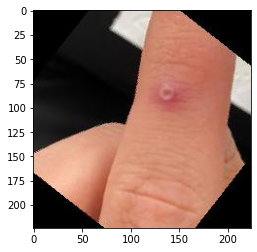

healthy


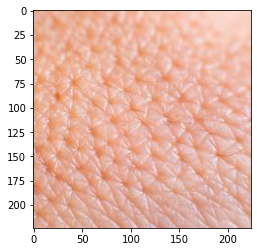

chickenpox


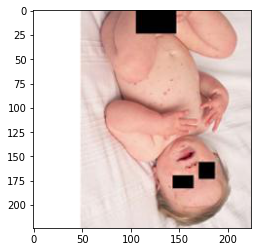

In [3]:
train_images = os.listdir('../input/monkeypox-skin-lesion-classification')
for folder in train_images :
    images = os.listdir('../input/monkeypox-skin-lesion-classification/'+str(folder))
    print(folder)
    img = mpimg.imread('../input/monkeypox-skin-lesion-classification/'+str(folder)+'/'+images[0])
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
train_path = '../input/monkeypox-skin-lesion-classification/monkeypox/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
import PIL
from PIL import Image
img = PIL.Image.open(train_path+str(files[0]))
wid, hgt = img.size
print(str(wid) + "x" + str(hgt))

224x224


In [5]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [6]:
Accuracy = {}

InceptionV3
* 4 hidden layers = 1024,512,128,64
* img_size = 400x400
* introduced batch normalization and dropout
* Accuracy obtained :

In [7]:
labels = os.listdir('../input/monkeypox-skin-lesion-classification')
img_size = 224
train_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

Found 21026 files belonging to 3 classes.
Using 16821 files for training.


2022-08-31 04:48:23.511614: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 21026 files belonging to 3 classes.
Using 4205 files for validation.


In [8]:
preprocess_input = tf.keras.applications.inception_v3.preprocess_input
pre_trained_model = tf.keras.applications.InceptionV3(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)

87924736/87910968 [==============================] - 0s 0us/step
Epoch 1/10


2022-08-31 04:48:35.395515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:58 - loss: 1.1825 - accuracy: 0.5234

Cleanup called...


  9/526 [..............................] - ETA: 14:52 - loss: 1.1492 - accuracy: 0.5278

Cleanup called...


 10/526 [..............................] - ETA: 14:53 - loss: 1.1150 - accuracy: 0.5437

Cleanup called...


 12/526 [..............................] - ETA: 14:51 - loss: 1.1083 - accuracy: 0.5469

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:52 - loss: 1.0416 - accuracy: 0.5737

Cleanup called...


 15/526 [..............................] - ETA: 14:48 - loss: 1.0214 - accuracy: 0.5771

Cleanup called...


 16/526 [..............................] - ETA: 14:46 - loss: 0.9833 - accuracy: 0.5918

Cleanup called...


 20/526 [>.............................] - ETA: 14:53 - loss: 0.9109 - accuracy: 0.6266

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:43 - loss: 0.8838 - accuracy: 0.6413

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:31 - loss: 0.8447 - accuracy: 0.6597

Cleanup called...


 29/526 [>.............................] - ETA: 14:25 - loss: 0.8291 - accuracy: 0.6670

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:20 - loss: 0.8272 - accuracy: 0.6694

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:15 - loss: 0.8144 - accuracy: 0.6733

Cleanup called...


 40/526 [=>............................] - ETA: 14:07 - loss: 0.7719 - accuracy: 0.6953

Cleanup called...


 41/526 [=>............................] - ETA: 14:05 - loss: 0.7694 - accuracy: 0.6959

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 14:02 - loss: 0.7629 - accuracy: 0.6987

Cleanup called...


 47/526 [=>............................] - ETA: 13:51 - loss: 0.7364 - accuracy: 0.7108

Cleanup called...


 48/526 [=>............................] - ETA: 13:49 - loss: 0.7379 - accuracy: 0.7116

Cleanup called...


 51/526 [=>............................] - ETA: 13:43 - loss: 0.7298 - accuracy: 0.7157

Cleanup called...


 54/526 [==>...........................] - ETA: 13:39 - loss: 0.7153 - accuracy: 0.7193

Cleanup called...


 55/526 [==>...........................] - ETA: 13:39 - loss: 0.7110 - accuracy: 0.7210

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:30 - loss: 0.6929 - accuracy: 0.7272

Cleanup called...


 69/526 [==>...........................] - ETA: 13:09 - loss: 0.6577 - accuracy: 0.7396

Cleanup called...


 71/526 [===>..........................] - ETA: 13:06 - loss: 0.6573 - accuracy: 0.7412

Cleanup called...


 73/526 [===>..........................] - ETA: 13:06 - loss: 0.6515 - accuracy: 0.7449

Cleanup called...


 74/526 [===>..........................] - ETA: 13:04 - loss: 0.6495 - accuracy: 0.7458

Cleanup called...


 77/526 [===>..........................] - ETA: 12:58 - loss: 0.6400 - accuracy: 0.7484

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:40 - loss: 0.6184 - accuracy: 0.7576

Cleanup called...


 95/526 [====>.........................] - ETA: 12:25 - loss: 0.6047 - accuracy: 0.7661

Cleanup called...


 99/526 [====>.........................] - ETA: 12:18 - loss: 0.6006 - accuracy: 0.7677

Cleanup called...


100/526 [====>.........................] - ETA: 12:16 - loss: 0.6014 - accuracy: 0.7678

Cleanup called...


101/526 [====>.........................] - ETA: 12:14 - loss: 0.6005 - accuracy: 0.7676

Cleanup called...


103/526 [====>.........................] - ETA: 12:10 - loss: 0.5966 - accuracy: 0.7688

Cleanup called...


104/526 [====>.........................] - ETA: 12:08 - loss: 0.5943 - accuracy: 0.7695

Cleanup called...


109/526 [=====>........................] - ETA: 11:59 - loss: 0.5835 - accuracy: 0.7747

Cleanup called...


110/526 [=====>........................] - ETA: 12:00 - loss: 0.5828 - accuracy: 0.7747

Cleanup called...


113/526 [=====>........................] - ETA: 11:55 - loss: 0.5790 - accuracy: 0.7754

Cleanup called...


119/526 [=====>........................] - ETA: 11:44 - loss: 0.5693 - accuracy: 0.7786

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:35 - loss: 0.5677 - accuracy: 0.7805

Cleanup called...


129/526 [======>.......................] - ETA: 11:28 - loss: 0.5619 - accuracy: 0.7815

Cleanup called...


130/526 [======>.......................] - ETA: 11:26 - loss: 0.5589 - accuracy: 0.7827

Cleanup called...


133/526 [======>.......................] - ETA: 11:21 - loss: 0.5615 - accuracy: 0.7817

Cleanup called...


136/526 [======>.......................] - ETA: 11:15 - loss: 0.5572 - accuracy: 0.7835

Cleanup called...


139/526 [======>.......................] - ETA: 11:09 - loss: 0.5574 - accuracy: 0.7844

Cleanup called...


142/526 [=======>......................] - ETA: 11:04 - loss: 0.5529 - accuracy: 0.7868

Cleanup called...


143/526 [=======>......................] - ETA: 11:02 - loss: 0.5519 - accuracy: 0.7874

Cleanup called...


144/526 [=======>......................] - ETA: 11:00 - loss: 0.5499 - accuracy: 0.7882

Cleanup called...


148/526 [=======>......................] - ETA: 10:55 - loss: 0.5450 - accuracy: 0.7897

Cleanup called...


150/526 [=======>......................] - ETA: 10:51 - loss: 0.5442 - accuracy: 0.7898

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:48 - loss: 0.5414 - accuracy: 0.7901

Cleanup called...


157/526 [=======>......................] - ETA: 10:38 - loss: 0.5360 - accuracy: 0.7922

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:36 - loss: 0.5352 - accuracy: 0.7923

Cleanup called...


159/526 [========>.....................] - ETA: 10:35 - loss: 0.5337 - accuracy: 0.7928

Cleanup called...


160/526 [========>.....................] - ETA: 10:33 - loss: 0.5320 - accuracy: 0.7936

Cleanup called...


164/526 [========>.....................] - ETA: 10:26 - loss: 0.5274 - accuracy: 0.7957

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:25 - loss: 0.5280 - accuracy: 0.7956

Cleanup called...


168/526 [========>.....................] - ETA: 10:19 - loss: 0.5242 - accuracy: 0.7967

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:16 - loss: 0.5244 - accuracy: 0.7965

Cleanup called...


174/526 [========>.....................] - ETA: 10:09 - loss: 0.5212 - accuracy: 0.7980

Cleanup called...


176/526 [=========>....................] - ETA: 10:05 - loss: 0.5221 - accuracy: 0.7983

Cleanup called...


177/526 [=========>....................] - ETA: 10:03 - loss: 0.5213 - accuracy: 0.7987

Cleanup called...


179/526 [=========>....................] - ETA: 10:00 - loss: 0.5204 - accuracy: 0.7999

Cleanup called...


184/526 [=========>....................] - ETA: 9:52 - loss: 0.5160 - accuracy: 0.8018

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:48 - loss: 0.5133 - accuracy: 0.8026

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:47 - loss: 0.5116 - accuracy: 0.8031

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:39 - loss: 0.5112 - accuracy: 0.8027

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:36 - loss: 0.5105 - accuracy: 0.8031

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:34 - loss: 0.5099 - accuracy: 0.8033

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:25 - loss: 0.5040 - accuracy: 0.8046

Cleanup called...


200/526 [==========>...................] - ETA: 9:23 - loss: 0.5026 - accuracy: 0.8052

Cleanup called...


202/526 [==========>...................] - ETA: 9:21 - loss: 0.5024 - accuracy: 0.8051

Cleanup called...


203/526 [==========>...................] - ETA: 9:19 - loss: 0.5008 - accuracy: 0.8059

Cleanup called...


205/526 [==========>...................] - ETA: 9:15 - loss: 0.4985 - accuracy: 0.8070

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:12 - loss: 0.4975 - accuracy: 0.8078

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:05 - loss: 0.4944 - accuracy: 0.8089

Cleanup called...


212/526 [===========>..................] - ETA: 9:03 - loss: 0.4931 - accuracy: 0.8094

Cleanup called...


214/526 [===========>..................] - ETA: 8:59 - loss: 0.4911 - accuracy: 0.8102

Cleanup called...


215/526 [===========>..................] - ETA: 8:57 - loss: 0.4897 - accuracy: 0.8106

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:54 - loss: 0.4885 - accuracy: 0.8113

Cleanup called...


219/526 [===========>..................] - ETA: 8:51 - loss: 0.4875 - accuracy: 0.8116

Cleanup called...


220/526 [===========>..................] - ETA: 8:49 - loss: 0.4866 - accuracy: 0.8121

Cleanup called...


221/526 [===========>..................] - ETA: 8:47 - loss: 0.4862 - accuracy: 0.8124

Cleanup called...


222/526 [===========>..................] - ETA: 8:46 - loss: 0.4851 - accuracy: 0.8126

Cleanup called...


223/526 [===========>..................] - ETA: 8:44 - loss: 0.4850 - accuracy: 0.8128

Cleanup called...


225/526 [===========>..................] - ETA: 8:40 - loss: 0.4840 - accuracy: 0.8129

Cleanup called...


226/526 [===========>..................] - ETA: 8:38 - loss: 0.4830 - accuracy: 0.8135

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:35 - loss: 0.4810 - accuracy: 0.8140

Cleanup called...


234/526 [============>.................] - ETA: 8:24 - loss: 0.4748 - accuracy: 0.8172

Cleanup called...


239/526 [============>.................] - ETA: 8:16 - loss: 0.4749 - accuracy: 0.8180

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:13 - loss: 0.4743 - accuracy: 0.8185

Cleanup called...


252/526 [=============>................] - ETA: 7:53 - loss: 0.4686 - accuracy: 0.8203

Cleanup called...


255/526 [=============>................] - ETA: 7:48 - loss: 0.4672 - accuracy: 0.8207

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:47 - loss: 0.4665 - accuracy: 0.8212

Cleanup called...


260/526 [=============>................] - ETA: 7:40 - loss: 0.4642 - accuracy: 0.8220

Cleanup called...


261/526 [=============>................] - ETA: 7:38 - loss: 0.4636 - accuracy: 0.8221

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:36 - loss: 0.4640 - accuracy: 0.8220

Cleanup called...


263/526 [==============>...............] - ETA: 7:35 - loss: 0.4646 - accuracy: 0.8219

Cleanup called...


264/526 [==============>...............] - ETA: 7:33 - loss: 0.4638 - accuracy: 0.8222

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:29 - loss: 0.4628 - accuracy: 0.8227

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:27 - loss: 0.4617 - accuracy: 0.8232

Cleanup called...


273/526 [==============>...............] - ETA: 7:17 - loss: 0.4566 - accuracy: 0.8252

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:16 - loss: 0.4554 - accuracy: 0.8257

Cleanup called...


281/526 [===============>..............] - ETA: 7:03 - loss: 0.4507 - accuracy: 0.8280

Cleanup called...


282/526 [===============>..............] - ETA: 7:02 - loss: 0.4499 - accuracy: 0.8282

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:58 - loss: 0.4485 - accuracy: 0.8287

Cleanup called...


288/526 [===============>..............] - ETA: 6:51 - loss: 0.4454 - accuracy: 0.8296

Cleanup called...


289/526 [===============>..............] - ETA: 6:49 - loss: 0.4451 - accuracy: 0.8298

Cleanup called...


290/526 [===============>..............] - ETA: 6:47 - loss: 0.4441 - accuracy: 0.8302

Cleanup called...


294/526 [===============>..............] - ETA: 6:41 - loss: 0.4413 - accuracy: 0.8311

Cleanup called...


297/526 [===============>..............] - ETA: 6:36 - loss: 0.4400 - accuracy: 0.8319

Cleanup called...


302/526 [================>.............] - ETA: 6:27 - loss: 0.4378 - accuracy: 0.8325

Cleanup called...


310/526 [================>.............] - ETA: 6:13 - loss: 0.4326 - accuracy: 0.8338

Cleanup called...


312/526 [================>.............] - ETA: 6:10 - loss: 0.4308 - accuracy: 0.8345

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:58 - loss: 0.4298 - accuracy: 0.8347

Cleanup called...


320/526 [=================>............] - ETA: 5:56 - loss: 0.4290 - accuracy: 0.8350

Cleanup called...


321/526 [=================>............] - ETA: 5:54 - loss: 0.4283 - accuracy: 0.8352

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:52 - loss: 0.4276 - accuracy: 0.8353

Cleanup called...


326/526 [=================>............] - ETA: 5:45 - loss: 0.4262 - accuracy: 0.8358

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:42 - loss: 0.4264 - accuracy: 0.8357

Cleanup called...


335/526 [==================>...........] - ETA: 5:30 - loss: 0.4224 - accuracy: 0.8369

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:28 - loss: 0.4222 - accuracy: 0.8371

Cleanup called...


341/526 [==================>...........] - ETA: 5:19 - loss: 0.4211 - accuracy: 0.8375

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:16 - loss: 0.4207 - accuracy: 0.8378

Cleanup called...


347/526 [==================>...........] - ETA: 5:09 - loss: 0.4186 - accuracy: 0.8387

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:04 - loss: 0.4166 - accuracy: 0.8395

Cleanup called...


359/526 [===================>..........] - ETA: 4:48 - loss: 0.4127 - accuracy: 0.8411

Cleanup called...


360/526 [===================>..........] - ETA: 4:46 - loss: 0.4126 - accuracy: 0.8411

Cleanup called...


361/526 [===================>..........] - ETA: 4:45 - loss: 0.4126 - accuracy: 0.8412

Cleanup called...


362/526 [===================>..........] - ETA: 4:43 - loss: 0.4120 - accuracy: 0.8412

Cleanup called...


363/526 [===================>..........] - ETA: 4:41 - loss: 0.4113 - accuracy: 0.8416

Cleanup called...


365/526 [===================>..........] - ETA: 4:38 - loss: 0.4108 - accuracy: 0.8420

Cleanup called...


368/526 [===================>..........] - ETA: 4:33 - loss: 0.4101 - accuracy: 0.8421

Cleanup called...


373/526 [====================>.........] - ETA: 4:24 - loss: 0.4068 - accuracy: 0.8434

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.4064 - accuracy: 0.8436

Cleanup called...


376/526 [====================>.........] - ETA: 4:19 - loss: 0.4051 - accuracy: 0.8439

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:12 - loss: 0.4027 - accuracy: 0.8447

Cleanup called...


381/526 [====================>.........] - ETA: 4:10 - loss: 0.4023 - accuracy: 0.8448

Cleanup called...


387/526 [=====================>........] - ETA: 4:00 - loss: 0.4000 - accuracy: 0.8457

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.3988 - accuracy: 0.8462

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:51 - loss: 0.3980 - accuracy: 0.8463

Cleanup called...


404/526 [======================>.......] - ETA: 3:31 - loss: 0.3929 - accuracy: 0.8479

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.3916 - accuracy: 0.8484

Cleanup called...


409/526 [======================>.......] - ETA: 3:22 - loss: 0.3905 - accuracy: 0.8489

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.3901 - accuracy: 0.8490

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.3897 - accuracy: 0.8492

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:17 - loss: 0.3893 - accuracy: 0.8493

Cleanup called...


413/526 [======================>.......] - ETA: 3:15 - loss: 0.3887 - accuracy: 0.8496

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.3884 - accuracy: 0.8498

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.3877 - accuracy: 0.8502

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:04 - loss: 0.3876 - accuracy: 0.8503

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.3862 - accuracy: 0.8509

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.3850 - accuracy: 0.8515

Cleanup called...


430/526 [=======================>......] - ETA: 2:46 - loss: 0.3835 - accuracy: 0.8521

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.3823 - accuracy: 0.8524

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:32 - loss: 0.3809 - accuracy: 0.8532

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.3809 - accuracy: 0.8532

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.3823 - accuracy: 0.8528

Cleanup called...


441/526 [========================>.....] - ETA: 2:27 - loss: 0.3817 - accuracy: 0.8530

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.3808 - accuracy: 0.8535

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.3797 - accuracy: 0.8540

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.3780 - accuracy: 0.8545

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.3774 - accuracy: 0.8548

Cleanup called...


456/526 [=========================>....] - ETA: 2:01 - loss: 0.3761 - accuracy: 0.8553

Cleanup called...


457/526 [=========================>....] - ETA: 1:59 - loss: 0.3757 - accuracy: 0.8555

Cleanup called...


460/526 [=========================>....] - ETA: 1:54 - loss: 0.3743 - accuracy: 0.8562

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.3741 - accuracy: 0.8563

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.3725 - accuracy: 0.8569

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.3714 - accuracy: 0.8572

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.3698 - accuracy: 0.8577

Cleanup called...


478/526 [==========================>...] - ETA: 1:23 - loss: 0.3684 - accuracy: 0.8581

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.3672 - accuracy: 0.8586

Cleanup called...


489/526 [==========================>...] - ETA: 1:04 - loss: 0.3664 - accuracy: 0.8590

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.3649 - accuracy: 0.8597

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.3632 - accuracy: 0.8603

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.3622 - accuracy: 0.8607

Cleanup called...


504/526 [===========================>..] - ETA: 38s - loss: 0.3621 - accuracy: 0.8607

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.3616 - accuracy: 0.8610

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.3612 - accuracy: 0.8611

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.3614 - accuracy: 0.8609

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.3604 - accuracy: 0.8611

Cleanup called...


526/526 [==============================] - 1133s 2s/step - loss: 0.3555 - accuracy: 0.8631 - val_loss: 0.2866 - val_accuracy: 0.8806
Epoch 2/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:55 - loss: 0.1908 - accuracy: 0.9453

Cleanup called...


  9/526 [..............................] - ETA: 15:15 - loss: 0.1869 - accuracy: 0.9479

Cleanup called...


 10/526 [..............................] - ETA: 15:11 - loss: 0.1791 - accuracy: 0.9500

Cleanup called...


 12/526 [..............................] - ETA: 14:59 - loss: 0.1858 - accuracy: 0.9453

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:50 - loss: 0.1967 - accuracy: 0.9397

Cleanup called...


 15/526 [..............................] - ETA: 14:47 - loss: 0.1968 - accuracy: 0.9354

Cleanup called...


 16/526 [..............................] - ETA: 14:45 - loss: 0.1919 - accuracy: 0.9375

Cleanup called...


 20/526 [>.............................] - ETA: 14:32 - loss: 0.1808 - accuracy: 0.9406

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:25 - loss: 0.1865 - accuracy: 0.9402

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:27 - loss: 0.1946 - accuracy: 0.9340

Cleanup called...


 29/526 [>.............................] - ETA: 14:22 - loss: 0.1866 - accuracy: 0.9375

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:16 - loss: 0.1873 - accuracy: 0.9345

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:11 - loss: 0.1892 - accuracy: 0.9337

Cleanup called...


 40/526 [=>............................] - ETA: 13:56 - loss: 0.1846 - accuracy: 0.9352

Cleanup called...


 41/526 [=>............................] - ETA: 13:54 - loss: 0.1829 - accuracy: 0.9360

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:55 - loss: 0.1875 - accuracy: 0.9338

Cleanup called...


 47/526 [=>............................] - ETA: 13:48 - loss: 0.1857 - accuracy: 0.9348

Cleanup called...


 48/526 [=>............................] - ETA: 13:46 - loss: 0.1856 - accuracy: 0.9355

Cleanup called...


 51/526 [=>............................] - ETA: 13:39 - loss: 0.1872 - accuracy: 0.9344

Cleanup called...


 54/526 [==>...........................] - ETA: 13:34 - loss: 0.1872 - accuracy: 0.9352

Cleanup called...


 55/526 [==>...........................] - ETA: 13:32 - loss: 0.1885 - accuracy: 0.9347

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:23 - loss: 0.1903 - accuracy: 0.9322

Cleanup called...


 69/526 [==>...........................] - ETA: 13:07 - loss: 0.1949 - accuracy: 0.9293

Cleanup called...


 71/526 [===>..........................] - ETA: 13:03 - loss: 0.1936 - accuracy: 0.9296

Cleanup called...


 73/526 [===>..........................] - ETA: 13:00 - loss: 0.1902 - accuracy: 0.9311

Cleanup called...


 74/526 [===>..........................] - ETA: 12:58 - loss: 0.1892 - accuracy: 0.9312

Cleanup called...


 77/526 [===>..........................] - ETA: 12:52 - loss: 0.1892 - accuracy: 0.9310

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:38 - loss: 0.1941 - accuracy: 0.9320

Cleanup called...


 95/526 [====>.........................] - ETA: 12:21 - loss: 0.1932 - accuracy: 0.9306

Cleanup called...


 99/526 [====>.........................] - ETA: 12:16 - loss: 0.1938 - accuracy: 0.9296

Cleanup called...


100/526 [====>.........................] - ETA: 12:14 - loss: 0.1925 - accuracy: 0.9303

Cleanup called...


101/526 [====>.........................] - ETA: 12:12 - loss: 0.1916 - accuracy: 0.9307

Cleanup called...


103/526 [====>.........................] - ETA: 12:08 - loss: 0.1930 - accuracy: 0.9299

Cleanup called...


104/526 [====>.........................] - ETA: 12:06 - loss: 0.1916 - accuracy: 0.9306

Cleanup called...


109/526 [=====>........................] - ETA: 11:57 - loss: 0.1957 - accuracy: 0.9300

Cleanup called...


110/526 [=====>........................] - ETA: 11:55 - loss: 0.1947 - accuracy: 0.9307

Cleanup called...


113/526 [=====>........................] - ETA: 11:50 - loss: 0.1957 - accuracy: 0.9306

Cleanup called...


119/526 [=====>........................] - ETA: 11:41 - loss: 0.1939 - accuracy: 0.9309

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:31 - loss: 0.1950 - accuracy: 0.9299

Cleanup called...


129/526 [======>.......................] - ETA: 11:22 - loss: 0.1941 - accuracy: 0.9307

Cleanup called...


130/526 [======>.......................] - ETA: 11:20 - loss: 0.1943 - accuracy: 0.9305

Cleanup called...


133/526 [======>.......................] - ETA: 11:15 - loss: 0.1936 - accuracy: 0.9302

Cleanup called...


136/526 [======>.......................] - ETA: 11:11 - loss: 0.1953 - accuracy: 0.9290

Cleanup called...


139/526 [======>.......................] - ETA: 11:06 - loss: 0.1949 - accuracy: 0.9292

Cleanup called...


142/526 [=======>......................] - ETA: 11:00 - loss: 0.1964 - accuracy: 0.9287

Cleanup called...


143/526 [=======>......................] - ETA: 10:58 - loss: 0.1958 - accuracy: 0.9290

Cleanup called...


144/526 [=======>......................] - ETA: 10:57 - loss: 0.1952 - accuracy: 0.9293

Cleanup called...


148/526 [=======>......................] - ETA: 10:49 - loss: 0.1949 - accuracy: 0.9295

Cleanup called...


150/526 [=======>......................] - ETA: 10:46 - loss: 0.1945 - accuracy: 0.9298

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:42 - loss: 0.1955 - accuracy: 0.9299

Cleanup called...


157/526 [=======>......................] - ETA: 10:34 - loss: 0.1972 - accuracy: 0.9293

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:32 - loss: 0.1975 - accuracy: 0.9292

Cleanup called...


159/526 [========>.....................] - ETA: 10:31 - loss: 0.1971 - accuracy: 0.9292

Cleanup called...


160/526 [========>.....................] - ETA: 10:29 - loss: 0.1961 - accuracy: 0.9297

Cleanup called...


164/526 [========>.....................] - ETA: 10:22 - loss: 0.1954 - accuracy: 0.9295

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:20 - loss: 0.1957 - accuracy: 0.9290

Cleanup called...


168/526 [========>.....................] - ETA: 10:14 - loss: 0.1951 - accuracy: 0.9297

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:11 - loss: 0.1943 - accuracy: 0.9298

Cleanup called...


174/526 [========>.....................] - ETA: 10:05 - loss: 0.1958 - accuracy: 0.9298

Cleanup called...


176/526 [=========>....................] - ETA: 10:01 - loss: 0.1950 - accuracy: 0.9299

Cleanup called...


177/526 [=========>....................] - ETA: 10:00 - loss: 0.1953 - accuracy: 0.9296

Cleanup called...


179/526 [=========>....................] - ETA: 9:56 - loss: 0.1957 - accuracy: 0.9293

Cleanup called...


184/526 [=========>....................] - ETA: 9:47 - loss: 0.1939 - accuracy: 0.9304

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:44 - loss: 0.1930 - accuracy: 0.9308

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:42 - loss: 0.1925 - accuracy: 0.9310

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:36 - loss: 0.1926 - accuracy: 0.9311

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:32 - loss: 0.1918 - accuracy: 0.9315

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:30 - loss: 0.1915 - accuracy: 0.9317

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:21 - loss: 0.1903 - accuracy: 0.9323

Cleanup called...


200/526 [==========>...................] - ETA: 9:20 - loss: 0.1901 - accuracy: 0.9322

Cleanup called...


202/526 [==========>...................] - ETA: 9:16 - loss: 0.1908 - accuracy: 0.9319

Cleanup called...


203/526 [==========>...................] - ETA: 9:14 - loss: 0.1905 - accuracy: 0.9320

Cleanup called...


205/526 [==========>...................] - ETA: 9:11 - loss: 0.1901 - accuracy: 0.9322

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:07 - loss: 0.1892 - accuracy: 0.9325

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:01 - loss: 0.1898 - accuracy: 0.9322

Cleanup called...


212/526 [===========>..................] - ETA: 9:00 - loss: 0.1897 - accuracy: 0.9322

Cleanup called...


214/526 [===========>..................] - ETA: 8:56 - loss: 0.1900 - accuracy: 0.9324

Cleanup called...


215/526 [===========>..................] - ETA: 8:54 - loss: 0.1903 - accuracy: 0.9320

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:51 - loss: 0.1898 - accuracy: 0.9322

Cleanup called...


219/526 [===========>..................] - ETA: 8:47 - loss: 0.1895 - accuracy: 0.9324

Cleanup called...


220/526 [===========>..................] - ETA: 8:45 - loss: 0.1898 - accuracy: 0.9322

Cleanup called...


221/526 [===========>..................] - ETA: 8:44 - loss: 0.1896 - accuracy: 0.9321

Cleanup called...


222/526 [===========>..................] - ETA: 8:42 - loss: 0.1895 - accuracy: 0.9323

Cleanup called...


223/526 [===========>..................] - ETA: 8:40 - loss: 0.1891 - accuracy: 0.9325

Cleanup called...


225/526 [===========>..................] - ETA: 8:37 - loss: 0.1881 - accuracy: 0.9328

Cleanup called...


226/526 [===========>..................] - ETA: 8:35 - loss: 0.1880 - accuracy: 0.9327

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:32 - loss: 0.1869 - accuracy: 0.9333

Cleanup called...


234/526 [============>.................] - ETA: 8:22 - loss: 0.1856 - accuracy: 0.9338

Cleanup called...


239/526 [============>.................] - ETA: 8:13 - loss: 0.1857 - accuracy: 0.9333

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:09 - loss: 0.1845 - accuracy: 0.9337

Cleanup called...


252/526 [=============>................] - ETA: 7:51 - loss: 0.1838 - accuracy: 0.9338

Cleanup called...


255/526 [=============>................] - ETA: 7:46 - loss: 0.1832 - accuracy: 0.9342

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:44 - loss: 0.1829 - accuracy: 0.9343

Cleanup called...


260/526 [=============>................] - ETA: 7:37 - loss: 0.1816 - accuracy: 0.9350

Cleanup called...


261/526 [=============>................] - ETA: 7:35 - loss: 0.1817 - accuracy: 0.9349

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:34 - loss: 0.1815 - accuracy: 0.9349

Cleanup called...


263/526 [==============>...............] - ETA: 7:32 - loss: 0.1815 - accuracy: 0.9350

Cleanup called...


264/526 [==============>...............] - ETA: 7:31 - loss: 0.1817 - accuracy: 0.9350

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:27 - loss: 0.1810 - accuracy: 0.9352

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:25 - loss: 0.1807 - accuracy: 0.9353

Cleanup called...


273/526 [==============>...............] - ETA: 7:15 - loss: 0.1799 - accuracy: 0.9357

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:13 - loss: 0.1800 - accuracy: 0.9357

Cleanup called...


281/526 [===============>..............] - ETA: 7:01 - loss: 0.1798 - accuracy: 0.9359

Cleanup called...


282/526 [===============>..............] - ETA: 7:00 - loss: 0.1794 - accuracy: 0.9362

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:56 - loss: 0.1787 - accuracy: 0.9364

Cleanup called...


288/526 [===============>..............] - ETA: 6:49 - loss: 0.1788 - accuracy: 0.9363

Cleanup called...


289/526 [===============>..............] - ETA: 6:47 - loss: 0.1785 - accuracy: 0.9364

Cleanup called...


290/526 [===============>..............] - ETA: 6:46 - loss: 0.1788 - accuracy: 0.9363

Cleanup called...


294/526 [===============>..............] - ETA: 6:39 - loss: 0.1777 - accuracy: 0.9368

Cleanup called...


297/526 [===============>..............] - ETA: 6:33 - loss: 0.1775 - accuracy: 0.9368

Cleanup called...


302/526 [================>.............] - ETA: 6:25 - loss: 0.1769 - accuracy: 0.9370

Cleanup called...


310/526 [================>.............] - ETA: 6:11 - loss: 0.1758 - accuracy: 0.9371

Cleanup called...


312/526 [================>.............] - ETA: 6:08 - loss: 0.1765 - accuracy: 0.9369

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:56 - loss: 0.1763 - accuracy: 0.9368

Cleanup called...


320/526 [=================>............] - ETA: 5:54 - loss: 0.1762 - accuracy: 0.9368

Cleanup called...


321/526 [=================>............] - ETA: 5:52 - loss: 0.1762 - accuracy: 0.9369

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:51 - loss: 0.1760 - accuracy: 0.9370

Cleanup called...


326/526 [=================>............] - ETA: 5:44 - loss: 0.1763 - accuracy: 0.9372

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:40 - loss: 0.1774 - accuracy: 0.9366

Cleanup called...


335/526 [==================>...........] - ETA: 5:28 - loss: 0.1785 - accuracy: 0.9362

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:26 - loss: 0.1782 - accuracy: 0.9363

Cleanup called...


341/526 [==================>...........] - ETA: 5:18 - loss: 0.1782 - accuracy: 0.9362

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:14 - loss: 0.1791 - accuracy: 0.9360

Cleanup called...


347/526 [==================>...........] - ETA: 5:07 - loss: 0.1816 - accuracy: 0.9350

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:02 - loss: 0.1824 - accuracy: 0.9346

Cleanup called...


359/526 [===================>..........] - ETA: 4:47 - loss: 0.1810 - accuracy: 0.9351

Cleanup called...


360/526 [===================>..........] - ETA: 4:45 - loss: 0.1812 - accuracy: 0.9352

Cleanup called...


361/526 [===================>..........] - ETA: 4:43 - loss: 0.1809 - accuracy: 0.9353

Cleanup called...


362/526 [===================>..........] - ETA: 4:42 - loss: 0.1809 - accuracy: 0.9354

Cleanup called...


363/526 [===================>..........] - ETA: 4:40 - loss: 0.1809 - accuracy: 0.9354

Cleanup called...


365/526 [===================>..........] - ETA: 4:36 - loss: 0.1810 - accuracy: 0.9354

Cleanup called...


368/526 [===================>..........] - ETA: 4:31 - loss: 0.1807 - accuracy: 0.9352

Cleanup called...


373/526 [====================>.........] - ETA: 4:23 - loss: 0.1827 - accuracy: 0.9346

Cleanup called...


374/526 [====================>.........] - ETA: 4:21 - loss: 0.1825 - accuracy: 0.9347

Cleanup called...


376/526 [====================>.........] - ETA: 4:18 - loss: 0.1823 - accuracy: 0.9348

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:11 - loss: 0.1817 - accuracy: 0.9350

Cleanup called...


381/526 [====================>.........] - ETA: 4:09 - loss: 0.1813 - accuracy: 0.9351

Cleanup called...


387/526 [=====================>........] - ETA: 3:58 - loss: 0.1815 - accuracy: 0.9353

Cleanup called...


389/526 [=====================>........] - ETA: 3:55 - loss: 0.1815 - accuracy: 0.9353

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:50 - loss: 0.1809 - accuracy: 0.9354

Cleanup called...


404/526 [======================>.......] - ETA: 3:29 - loss: 0.1791 - accuracy: 0.9361

Cleanup called...


407/526 [======================>.......] - ETA: 3:24 - loss: 0.1787 - accuracy: 0.9362

Cleanup called...


409/526 [======================>.......] - ETA: 3:21 - loss: 0.1784 - accuracy: 0.9364

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:19 - loss: 0.1784 - accuracy: 0.9364

Cleanup called...


411/526 [======================>.......] - ETA: 3:17 - loss: 0.1782 - accuracy: 0.9364

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:16 - loss: 0.1781 - accuracy: 0.9364

Cleanup called...


413/526 [======================>.......] - ETA: 3:14 - loss: 0.1781 - accuracy: 0.9365

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:10 - loss: 0.1776 - accuracy: 0.9367

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:05 - loss: 0.1769 - accuracy: 0.9370

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:03 - loss: 0.1767 - accuracy: 0.9371

Cleanup called...


422/526 [=======================>......] - ETA: 2:58 - loss: 0.1770 - accuracy: 0.9371

Cleanup called...


425/526 [=======================>......] - ETA: 2:53 - loss: 0.1766 - accuracy: 0.9372

Cleanup called...


430/526 [=======================>......] - ETA: 2:45 - loss: 0.1759 - accuracy: 0.9375

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:39 - loss: 0.1750 - accuracy: 0.9379

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:31 - loss: 0.1740 - accuracy: 0.9384

Cleanup called...


439/526 [========================>.....] - ETA: 2:29 - loss: 0.1738 - accuracy: 0.9384

Cleanup called...


440/526 [========================>.....] - ETA: 2:27 - loss: 0.1736 - accuracy: 0.9386

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.1737 - accuracy: 0.9386

Cleanup called...


444/526 [========================>.....] - ETA: 2:20 - loss: 0.1736 - accuracy: 0.9386

Cleanup called...


447/526 [========================>.....] - ETA: 2:15 - loss: 0.1731 - accuracy: 0.9388

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:08 - loss: 0.1728 - accuracy: 0.9390

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.1730 - accuracy: 0.9390

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.1729 - accuracy: 0.9390

Cleanup called...


457/526 [=========================>....] - ETA: 1:58 - loss: 0.1729 - accuracy: 0.9388

Cleanup called...


460/526 [=========================>....] - ETA: 1:53 - loss: 0.1724 - accuracy: 0.9389

Cleanup called...


461/526 [=========================>....] - ETA: 1:51 - loss: 0.1721 - accuracy: 0.9390

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:44 - loss: 0.1720 - accuracy: 0.9390

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:39 - loss: 0.1716 - accuracy: 0.9391

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:32 - loss: 0.1710 - accuracy: 0.9393

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.1714 - accuracy: 0.9391

Cleanup called...


483/526 [==========================>...] - ETA: 1:13 - loss: 0.1714 - accuracy: 0.9391

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.1710 - accuracy: 0.9392

Cleanup called...


494/526 [===========================>..] - ETA: 54s - loss: 0.1703 - accuracy: 0.9396

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.1698 - accuracy: 0.9397

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.1699 - accuracy: 0.9397

Cleanup called...


504/526 [===========================>..] - ETA: 37s - loss: 0.1707 - accuracy: 0.9395

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.1707 - accuracy: 0.9395

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.1705 - accuracy: 0.9396

Cleanup called...


508/526 [===========================>..] - ETA: 30s - loss: 0.1707 - accuracy: 0.9395

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.1703 - accuracy: 0.9396

Cleanup called...


526/526 [==============================] - 1113s 2s/step - loss: 0.1684 - accuracy: 0.9403 - val_loss: 0.1046 - val_accuracy: 0.9634
Epoch 3/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 16:58 - loss: 0.0769 - accuracy: 0.9688

Cleanup called...


  9/526 [..............................] - ETA: 15:22 - loss: 0.1403 - accuracy: 0.9444

Cleanup called...


 10/526 [..............................] - ETA: 15:14 - loss: 0.1464 - accuracy: 0.9438

Cleanup called...


 12/526 [..............................] - ETA: 15:00 - loss: 0.1586 - accuracy: 0.9401

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:51 - loss: 0.1446 - accuracy: 0.9464

Cleanup called...


 15/526 [..............................] - ETA: 14:48 - loss: 0.1381 - accuracy: 0.9479

Cleanup called...


 16/526 [..............................] - ETA: 14:44 - loss: 0.1380 - accuracy: 0.9473

Cleanup called...


 20/526 [>.............................] - ETA: 14:30 - loss: 0.1415 - accuracy: 0.9422

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:38 - loss: 0.1414 - accuracy: 0.9416

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:26 - loss: 0.1357 - accuracy: 0.9444

Cleanup called...


 29/526 [>.............................] - ETA: 14:20 - loss: 0.1338 - accuracy: 0.9440

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:14 - loss: 0.1325 - accuracy: 0.9446

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:08 - loss: 0.1258 - accuracy: 0.9479

Cleanup called...


 40/526 [=>............................] - ETA: 13:58 - loss: 0.1191 - accuracy: 0.9547

Cleanup called...


 41/526 [=>............................] - ETA: 13:58 - loss: 0.1171 - accuracy: 0.9558

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:56 - loss: 0.1163 - accuracy: 0.9568

Cleanup called...


 47/526 [=>............................] - ETA: 13:44 - loss: 0.1163 - accuracy: 0.9568

Cleanup called...


 48/526 [=>............................] - ETA: 13:42 - loss: 0.1165 - accuracy: 0.9551

Cleanup called...


 51/526 [=>............................] - ETA: 13:35 - loss: 0.1181 - accuracy: 0.9553

Cleanup called...


 54/526 [==>...........................] - ETA: 13:29 - loss: 0.1156 - accuracy: 0.9566

Cleanup called...


 55/526 [==>...........................] - ETA: 13:28 - loss: 0.1179 - accuracy: 0.9551

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:24 - loss: 0.1207 - accuracy: 0.9539

Cleanup called...


 69/526 [==>...........................] - ETA: 13:03 - loss: 0.1208 - accuracy: 0.9552

Cleanup called...


 71/526 [===>..........................] - ETA: 12:59 - loss: 0.1200 - accuracy: 0.9555

Cleanup called...


 73/526 [===>..........................] - ETA: 12:56 - loss: 0.1237 - accuracy: 0.9538

Cleanup called...


 74/526 [===>..........................] - ETA: 12:53 - loss: 0.1222 - accuracy: 0.9544

Cleanup called...


 77/526 [===>..........................] - ETA: 12:47 - loss: 0.1230 - accuracy: 0.9545

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:34 - loss: 0.1257 - accuracy: 0.9557

Cleanup called...


 95/526 [====>.........................] - ETA: 12:18 - loss: 0.1257 - accuracy: 0.9559

Cleanup called...


 99/526 [====>.........................] - ETA: 12:14 - loss: 0.1234 - accuracy: 0.9568

Cleanup called...


100/526 [====>.........................] - ETA: 12:12 - loss: 0.1238 - accuracy: 0.9569

Cleanup called...


101/526 [====>.........................] - ETA: 12:10 - loss: 0.1237 - accuracy: 0.9570

Cleanup called...


103/526 [====>.........................] - ETA: 12:06 - loss: 0.1223 - accuracy: 0.9575

Cleanup called...


104/526 [====>.........................] - ETA: 12:04 - loss: 0.1238 - accuracy: 0.9570

Cleanup called...


109/526 [=====>........................] - ETA: 11:55 - loss: 0.1215 - accuracy: 0.9579

Cleanup called...


110/526 [=====>........................] - ETA: 11:53 - loss: 0.1224 - accuracy: 0.9577

Cleanup called...


113/526 [=====>........................] - ETA: 11:48 - loss: 0.1215 - accuracy: 0.9577

Cleanup called...


119/526 [=====>........................] - ETA: 11:39 - loss: 0.1264 - accuracy: 0.9569

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:30 - loss: 0.1283 - accuracy: 0.9564

Cleanup called...


129/526 [======>.......................] - ETA: 11:21 - loss: 0.1298 - accuracy: 0.9557

Cleanup called...


130/526 [======>.......................] - ETA: 11:19 - loss: 0.1299 - accuracy: 0.9558

Cleanup called...


133/526 [======>.......................] - ETA: 11:15 - loss: 0.1310 - accuracy: 0.9551

Cleanup called...


136/526 [======>.......................] - ETA: 11:10 - loss: 0.1313 - accuracy: 0.9547

Cleanup called...


139/526 [======>.......................] - ETA: 11:04 - loss: 0.1310 - accuracy: 0.9546

Cleanup called...


142/526 [=======>......................] - ETA: 10:59 - loss: 0.1295 - accuracy: 0.9553

Cleanup called...


143/526 [=======>......................] - ETA: 10:57 - loss: 0.1311 - accuracy: 0.9550

Cleanup called...


144/526 [=======>......................] - ETA: 10:55 - loss: 0.1318 - accuracy: 0.9546

Cleanup called...


148/526 [=======>......................] - ETA: 10:48 - loss: 0.1317 - accuracy: 0.9548

Cleanup called...


150/526 [=======>......................] - ETA: 10:44 - loss: 0.1307 - accuracy: 0.9550

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:42 - loss: 0.1295 - accuracy: 0.9556

Cleanup called...


157/526 [=======>......................] - ETA: 10:33 - loss: 0.1281 - accuracy: 0.9560

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:31 - loss: 0.1282 - accuracy: 0.9557

Cleanup called...


159/526 [========>.....................] - ETA: 10:29 - loss: 0.1277 - accuracy: 0.9560

Cleanup called...


160/526 [========>.....................] - ETA: 10:28 - loss: 0.1279 - accuracy: 0.9559

Cleanup called...


164/526 [========>.....................] - ETA: 10:20 - loss: 0.1272 - accuracy: 0.9564

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:19 - loss: 0.1268 - accuracy: 0.9566

Cleanup called...


168/526 [========>.....................] - ETA: 10:13 - loss: 0.1268 - accuracy: 0.9567

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:11 - loss: 0.1259 - accuracy: 0.9570

Cleanup called...


174/526 [========>.....................] - ETA: 10:04 - loss: 0.1276 - accuracy: 0.9564

Cleanup called...


176/526 [=========>....................] - ETA: 10:00 - loss: 0.1267 - accuracy: 0.9567

Cleanup called...


177/526 [=========>....................] - ETA: 9:58 - loss: 0.1262 - accuracy: 0.9569 

Cleanup called...


179/526 [=========>....................] - ETA: 9:55 - loss: 0.1261 - accuracy: 0.9569

Cleanup called...


184/526 [=========>....................] - ETA: 9:46 - loss: 0.1258 - accuracy: 0.9562

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:42 - loss: 0.1259 - accuracy: 0.9561

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:40 - loss: 0.1264 - accuracy: 0.9560

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:34 - loss: 0.1254 - accuracy: 0.9568

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:31 - loss: 0.1249 - accuracy: 0.9569

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:29 - loss: 0.1245 - accuracy: 0.9570

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:20 - loss: 0.1234 - accuracy: 0.9574

Cleanup called...


200/526 [==========>...................] - ETA: 9:19 - loss: 0.1250 - accuracy: 0.9567

Cleanup called...


202/526 [==========>...................] - ETA: 9:15 - loss: 0.1252 - accuracy: 0.9565

Cleanup called...


203/526 [==========>...................] - ETA: 9:14 - loss: 0.1251 - accuracy: 0.9566

Cleanup called...


205/526 [==========>...................] - ETA: 9:10 - loss: 0.1256 - accuracy: 0.9563

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:08 - loss: 0.1247 - accuracy: 0.9567

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:00 - loss: 0.1246 - accuracy: 0.9566

Cleanup called...


212/526 [===========>..................] - ETA: 8:59 - loss: 0.1244 - accuracy: 0.9567

Cleanup called...


214/526 [===========>..................] - ETA: 8:55 - loss: 0.1244 - accuracy: 0.9566

Cleanup called...


215/526 [===========>..................] - ETA: 8:53 - loss: 0.1241 - accuracy: 0.9567

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:50 - loss: 0.1240 - accuracy: 0.9564

Cleanup called...


219/526 [===========>..................] - ETA: 8:46 - loss: 0.1234 - accuracy: 0.9566

Cleanup called...


220/526 [===========>..................] - ETA: 8:45 - loss: 0.1231 - accuracy: 0.9568

Cleanup called...


221/526 [===========>..................] - ETA: 8:43 - loss: 0.1230 - accuracy: 0.9569

Cleanup called...


222/526 [===========>..................] - ETA: 8:41 - loss: 0.1230 - accuracy: 0.9568

Cleanup called...


223/526 [===========>..................] - ETA: 8:39 - loss: 0.1233 - accuracy: 0.9567

Cleanup called...


225/526 [===========>..................] - ETA: 8:36 - loss: 0.1226 - accuracy: 0.9571

Cleanup called...


226/526 [===========>..................] - ETA: 8:35 - loss: 0.1223 - accuracy: 0.9571

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:31 - loss: 0.1227 - accuracy: 0.9571

Cleanup called...


234/526 [============>.................] - ETA: 8:21 - loss: 0.1223 - accuracy: 0.9574

Cleanup called...


239/526 [============>.................] - ETA: 8:12 - loss: 0.1223 - accuracy: 0.9574

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:09 - loss: 0.1225 - accuracy: 0.9571

Cleanup called...


252/526 [=============>................] - ETA: 7:50 - loss: 0.1232 - accuracy: 0.9568

Cleanup called...


255/526 [=============>................] - ETA: 7:45 - loss: 0.1226 - accuracy: 0.9571

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:43 - loss: 0.1231 - accuracy: 0.9569

Cleanup called...


260/526 [=============>................] - ETA: 7:36 - loss: 0.1230 - accuracy: 0.9570

Cleanup called...


261/526 [=============>................] - ETA: 7:34 - loss: 0.1230 - accuracy: 0.9570

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:33 - loss: 0.1232 - accuracy: 0.9571

Cleanup called...


263/526 [==============>...............] - ETA: 7:31 - loss: 0.1229 - accuracy: 0.9572

Cleanup called...


264/526 [==============>...............] - ETA: 7:30 - loss: 0.1226 - accuracy: 0.9574

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:26 - loss: 0.1222 - accuracy: 0.9575

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:24 - loss: 0.1221 - accuracy: 0.9575

Cleanup called...


273/526 [==============>...............] - ETA: 7:14 - loss: 0.1225 - accuracy: 0.9568

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:12 - loss: 0.1224 - accuracy: 0.9568

Cleanup called...


281/526 [===============>..............] - ETA: 7:00 - loss: 0.1223 - accuracy: 0.9566

Cleanup called...


282/526 [===============>..............] - ETA: 6:59 - loss: 0.1220 - accuracy: 0.9568

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:55 - loss: 0.1218 - accuracy: 0.9569

Cleanup called...


288/526 [===============>..............] - ETA: 6:48 - loss: 0.1208 - accuracy: 0.9572

Cleanup called...


289/526 [===============>..............] - ETA: 6:46 - loss: 0.1205 - accuracy: 0.9574

Cleanup called...


290/526 [===============>..............] - ETA: 6:45 - loss: 0.1204 - accuracy: 0.9573

Cleanup called...


294/526 [===============>..............] - ETA: 6:38 - loss: 0.1198 - accuracy: 0.9576

Cleanup called...


297/526 [===============>..............] - ETA: 6:32 - loss: 0.1195 - accuracy: 0.9577

Cleanup called...


302/526 [================>.............] - ETA: 6:24 - loss: 0.1193 - accuracy: 0.9580

Cleanup called...


310/526 [================>.............] - ETA: 6:10 - loss: 0.1190 - accuracy: 0.9580

Cleanup called...


312/526 [================>.............] - ETA: 6:07 - loss: 0.1185 - accuracy: 0.9582

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:55 - loss: 0.1191 - accuracy: 0.9582

Cleanup called...


320/526 [=================>............] - ETA: 5:53 - loss: 0.1190 - accuracy: 0.9582

Cleanup called...


321/526 [=================>............] - ETA: 5:51 - loss: 0.1191 - accuracy: 0.9581

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:50 - loss: 0.1201 - accuracy: 0.9579

Cleanup called...


326/526 [=================>............] - ETA: 5:43 - loss: 0.1205 - accuracy: 0.9577

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:39 - loss: 0.1205 - accuracy: 0.9577

Cleanup called...


335/526 [==================>...........] - ETA: 5:27 - loss: 0.1201 - accuracy: 0.9578

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:26 - loss: 0.1198 - accuracy: 0.9580

Cleanup called...


341/526 [==================>...........] - ETA: 5:17 - loss: 0.1205 - accuracy: 0.9578

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:14 - loss: 0.1231 - accuracy: 0.9574

Cleanup called...


347/526 [==================>...........] - ETA: 5:07 - loss: 0.1228 - accuracy: 0.9575

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:01 - loss: 0.1225 - accuracy: 0.9575

Cleanup called...


359/526 [===================>..........] - ETA: 4:46 - loss: 0.1232 - accuracy: 0.9573

Cleanup called...


360/526 [===================>..........] - ETA: 4:44 - loss: 0.1231 - accuracy: 0.9573

Cleanup called...


361/526 [===================>..........] - ETA: 4:43 - loss: 0.1230 - accuracy: 0.9573

Cleanup called...


362/526 [===================>..........] - ETA: 4:41 - loss: 0.1233 - accuracy: 0.9572

Cleanup called...


363/526 [===================>..........] - ETA: 4:39 - loss: 0.1235 - accuracy: 0.9571

Cleanup called...


365/526 [===================>..........] - ETA: 4:36 - loss: 0.1240 - accuracy: 0.9570

Cleanup called...


368/526 [===================>..........] - ETA: 4:31 - loss: 0.1241 - accuracy: 0.9569

Cleanup called...


373/526 [====================>.........] - ETA: 4:22 - loss: 0.1236 - accuracy: 0.9570

Cleanup called...


374/526 [====================>.........] - ETA: 4:21 - loss: 0.1236 - accuracy: 0.9568

Cleanup called...


376/526 [====================>.........] - ETA: 4:17 - loss: 0.1250 - accuracy: 0.9564

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:10 - loss: 0.1254 - accuracy: 0.9565

Cleanup called...


381/526 [====================>.........] - ETA: 4:08 - loss: 0.1253 - accuracy: 0.9564

Cleanup called...


387/526 [=====================>........] - ETA: 3:58 - loss: 0.1263 - accuracy: 0.9560

Cleanup called...


389/526 [=====================>........] - ETA: 3:55 - loss: 0.1264 - accuracy: 0.9560

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:50 - loss: 0.1260 - accuracy: 0.9560

Cleanup called...


404/526 [======================>.......] - ETA: 3:29 - loss: 0.1256 - accuracy: 0.9561

Cleanup called...


407/526 [======================>.......] - ETA: 3:24 - loss: 0.1255 - accuracy: 0.9562

Cleanup called...


409/526 [======================>.......] - ETA: 3:20 - loss: 0.1251 - accuracy: 0.9564

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:19 - loss: 0.1250 - accuracy: 0.9565

Cleanup called...


411/526 [======================>.......] - ETA: 3:17 - loss: 0.1248 - accuracy: 0.9566

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:15 - loss: 0.1249 - accuracy: 0.9565

Cleanup called...


413/526 [======================>.......] - ETA: 3:14 - loss: 0.1252 - accuracy: 0.9563

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:10 - loss: 0.1248 - accuracy: 0.9566

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:05 - loss: 0.1243 - accuracy: 0.9567

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:03 - loss: 0.1243 - accuracy: 0.9567

Cleanup called...


422/526 [=======================>......] - ETA: 2:58 - loss: 0.1248 - accuracy: 0.9565

Cleanup called...


425/526 [=======================>......] - ETA: 2:53 - loss: 0.1242 - accuracy: 0.9568

Cleanup called...


430/526 [=======================>......] - ETA: 2:44 - loss: 0.1233 - accuracy: 0.9572

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:39 - loss: 0.1235 - accuracy: 0.9572

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:31 - loss: 0.1245 - accuracy: 0.9570

Cleanup called...


439/526 [========================>.....] - ETA: 2:29 - loss: 0.1244 - accuracy: 0.9571

Cleanup called...


440/526 [========================>.....] - ETA: 2:27 - loss: 0.1241 - accuracy: 0.9572

Cleanup called...


441/526 [========================>.....] - ETA: 2:25 - loss: 0.1240 - accuracy: 0.9572

Cleanup called...


444/526 [========================>.....] - ETA: 2:20 - loss: 0.1236 - accuracy: 0.9573

Cleanup called...


447/526 [========================>.....] - ETA: 2:15 - loss: 0.1238 - accuracy: 0.9573

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:08 - loss: 0.1236 - accuracy: 0.9574

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.1238 - accuracy: 0.9573

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.1234 - accuracy: 0.9575

Cleanup called...


457/526 [=========================>....] - ETA: 1:58 - loss: 0.1232 - accuracy: 0.9576

Cleanup called...


460/526 [=========================>....] - ETA: 1:53 - loss: 0.1231 - accuracy: 0.9576

Cleanup called...


461/526 [=========================>....] - ETA: 1:51 - loss: 0.1230 - accuracy: 0.9576

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:44 - loss: 0.1242 - accuracy: 0.9574

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:39 - loss: 0.1237 - accuracy: 0.9576

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:32 - loss: 0.1235 - accuracy: 0.9577

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.1246 - accuracy: 0.9574

Cleanup called...


483/526 [==========================>...] - ETA: 1:13 - loss: 0.1245 - accuracy: 0.9576

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.1248 - accuracy: 0.9574

Cleanup called...


494/526 [===========================>..] - ETA: 54s - loss: 0.1243 - accuracy: 0.9575

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.1244 - accuracy: 0.9573

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.1236 - accuracy: 0.9576

Cleanup called...


504/526 [===========================>..] - ETA: 37s - loss: 0.1237 - accuracy: 0.9576

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.1240 - accuracy: 0.9574

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.1239 - accuracy: 0.9575

Cleanup called...


508/526 [===========================>..] - ETA: 30s - loss: 0.1239 - accuracy: 0.9576

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.1235 - accuracy: 0.9576

Cleanup called...


526/526 [==============================] - 1114s 2s/step - loss: 0.1250 - accuracy: 0.9569 - val_loss: 0.1798 - val_accuracy: 0.9310
Epoch 4/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 15:00 - loss: 0.0867 - accuracy: 0.9688

Cleanup called...


  9/526 [..............................] - ETA: 14:37 - loss: 0.0667 - accuracy: 0.9792

Cleanup called...


 10/526 [..............................] - ETA: 14:34 - loss: 0.0621 - accuracy: 0.9812

Cleanup called...


 12/526 [..............................] - ETA: 14:27 - loss: 0.0575 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:25 - loss: 0.0625 - accuracy: 0.9821

Cleanup called...


 15/526 [..............................] - ETA: 14:23 - loss: 0.0632 - accuracy: 0.9792

Cleanup called...


 16/526 [..............................] - ETA: 14:20 - loss: 0.0630 - accuracy: 0.9805

Cleanup called...


 20/526 [>.............................] - ETA: 14:33 - loss: 0.0731 - accuracy: 0.9766

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:24 - loss: 0.0710 - accuracy: 0.9755

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:14 - loss: 0.0728 - accuracy: 0.9745

Cleanup called...


 29/526 [>.............................] - ETA: 14:09 - loss: 0.0697 - accuracy: 0.9763

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:04 - loss: 0.0716 - accuracy: 0.9758

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:02 - loss: 0.0704 - accuracy: 0.9763

Cleanup called...


 40/526 [=>............................] - ETA: 13:57 - loss: 0.0726 - accuracy: 0.9773

Cleanup called...


 41/526 [=>............................] - ETA: 13:54 - loss: 0.0799 - accuracy: 0.9741

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:52 - loss: 0.0807 - accuracy: 0.9740

Cleanup called...


 47/526 [=>............................] - ETA: 13:42 - loss: 0.0777 - accuracy: 0.9747

Cleanup called...


 48/526 [=>............................] - ETA: 13:39 - loss: 0.0797 - accuracy: 0.9733

Cleanup called...


 51/526 [=>............................] - ETA: 13:33 - loss: 0.0876 - accuracy: 0.9706

Cleanup called...


 54/526 [==>...........................] - ETA: 13:27 - loss: 0.0902 - accuracy: 0.9699

Cleanup called...


 55/526 [==>...........................] - ETA: 13:25 - loss: 0.0922 - accuracy: 0.9682

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:23 - loss: 0.0928 - accuracy: 0.9672

Cleanup called...


 69/526 [==>...........................] - ETA: 13:03 - loss: 0.0903 - accuracy: 0.9678

Cleanup called...


 71/526 [===>..........................] - ETA: 12:59 - loss: 0.0889 - accuracy: 0.9683

Cleanup called...


 73/526 [===>..........................] - ETA: 12:57 - loss: 0.0875 - accuracy: 0.9683

Cleanup called...


 74/526 [===>..........................] - ETA: 12:59 - loss: 0.0920 - accuracy: 0.9679

Cleanup called...


 77/526 [===>..........................] - ETA: 12:53 - loss: 0.0904 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:35 - loss: 0.0930 - accuracy: 0.9691

Cleanup called...


 95/526 [====>.........................] - ETA: 12:21 - loss: 0.0922 - accuracy: 0.9701

Cleanup called...


 99/526 [====>.........................] - ETA: 12:14 - loss: 0.0944 - accuracy: 0.9691

Cleanup called...


100/526 [====>.........................] - ETA: 12:12 - loss: 0.0940 - accuracy: 0.9691

Cleanup called...


101/526 [====>.........................] - ETA: 12:10 - loss: 0.0936 - accuracy: 0.9691

Cleanup called...


103/526 [====>.........................] - ETA: 12:07 - loss: 0.0946 - accuracy: 0.9684

Cleanup called...


104/526 [====>.........................] - ETA: 12:05 - loss: 0.0941 - accuracy: 0.9688

Cleanup called...


109/526 [=====>........................] - ETA: 11:56 - loss: 0.0940 - accuracy: 0.9688

Cleanup called...


110/526 [=====>........................] - ETA: 11:54 - loss: 0.0937 - accuracy: 0.9688

Cleanup called...


113/526 [=====>........................] - ETA: 11:51 - loss: 0.0930 - accuracy: 0.9688

Cleanup called...


119/526 [=====>........................] - ETA: 11:40 - loss: 0.0924 - accuracy: 0.9693

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:31 - loss: 0.0913 - accuracy: 0.9700

Cleanup called...


129/526 [======>.......................] - ETA: 11:23 - loss: 0.0903 - accuracy: 0.9704

Cleanup called...


130/526 [======>.......................] - ETA: 11:22 - loss: 0.0898 - accuracy: 0.9707

Cleanup called...


133/526 [======>.......................] - ETA: 11:16 - loss: 0.0900 - accuracy: 0.9706

Cleanup called...


136/526 [======>.......................] - ETA: 11:11 - loss: 0.0898 - accuracy: 0.9710

Cleanup called...


139/526 [======>.......................] - ETA: 11:05 - loss: 0.0890 - accuracy: 0.9712

Cleanup called...


142/526 [=======>......................] - ETA: 11:00 - loss: 0.0881 - accuracy: 0.9714

Cleanup called...


143/526 [=======>......................] - ETA: 10:58 - loss: 0.0892 - accuracy: 0.9709

Cleanup called...


144/526 [=======>......................] - ETA: 10:56 - loss: 0.0888 - accuracy: 0.9711

Cleanup called...


148/526 [=======>......................] - ETA: 10:51 - loss: 0.0885 - accuracy: 0.9715

Cleanup called...


150/526 [=======>......................] - ETA: 10:47 - loss: 0.0910 - accuracy: 0.9708

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:43 - loss: 0.0909 - accuracy: 0.9708

Cleanup called...


157/526 [=======>......................] - ETA: 10:34 - loss: 0.0924 - accuracy: 0.9699

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:32 - loss: 0.0921 - accuracy: 0.9699

Cleanup called...


159/526 [========>.....................] - ETA: 10:31 - loss: 0.0916 - accuracy: 0.9701

Cleanup called...


160/526 [========>.....................] - ETA: 10:29 - loss: 0.0916 - accuracy: 0.9701

Cleanup called...


164/526 [========>.....................] - ETA: 10:22 - loss: 0.0910 - accuracy: 0.9701

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:20 - loss: 0.0910 - accuracy: 0.9699

Cleanup called...


168/526 [========>.....................] - ETA: 10:16 - loss: 0.0903 - accuracy: 0.9701

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:12 - loss: 0.0904 - accuracy: 0.9699

Cleanup called...


174/526 [========>.....................] - ETA: 10:05 - loss: 0.0901 - accuracy: 0.9700

Cleanup called...


176/526 [=========>....................] - ETA: 10:02 - loss: 0.0904 - accuracy: 0.9695

Cleanup called...


177/526 [=========>....................] - ETA: 10:00 - loss: 0.0905 - accuracy: 0.9695

Cleanup called...


179/526 [=========>....................] - ETA: 9:56 - loss: 0.0897 - accuracy: 0.9698

Cleanup called...


184/526 [=========>....................] - ETA: 9:47 - loss: 0.0910 - accuracy: 0.9696

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:45 - loss: 0.0913 - accuracy: 0.9694

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:43 - loss: 0.0909 - accuracy: 0.9696

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:36 - loss: 0.0913 - accuracy: 0.9691

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:32 - loss: 0.0920 - accuracy: 0.9686

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:31 - loss: 0.0924 - accuracy: 0.9686

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:22 - loss: 0.0923 - accuracy: 0.9688

Cleanup called...


200/526 [==========>...................] - ETA: 9:20 - loss: 0.0922 - accuracy: 0.9688

Cleanup called...


202/526 [==========>...................] - ETA: 9:17 - loss: 0.0922 - accuracy: 0.9686

Cleanup called...


203/526 [==========>...................] - ETA: 9:16 - loss: 0.0922 - accuracy: 0.9686

Cleanup called...


205/526 [==========>...................] - ETA: 9:12 - loss: 0.0922 - accuracy: 0.9686

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:09 - loss: 0.0923 - accuracy: 0.9686

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:02 - loss: 0.0933 - accuracy: 0.9685

Cleanup called...


212/526 [===========>..................] - ETA: 9:00 - loss: 0.0938 - accuracy: 0.9685

Cleanup called...


214/526 [===========>..................] - ETA: 8:56 - loss: 0.0940 - accuracy: 0.9685

Cleanup called...


215/526 [===========>..................] - ETA: 8:55 - loss: 0.0938 - accuracy: 0.9686

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:51 - loss: 0.0947 - accuracy: 0.9685

Cleanup called...


219/526 [===========>..................] - ETA: 8:48 - loss: 0.0950 - accuracy: 0.9685

Cleanup called...


220/526 [===========>..................] - ETA: 8:46 - loss: 0.0947 - accuracy: 0.9686

Cleanup called...


221/526 [===========>..................] - ETA: 8:44 - loss: 0.0944 - accuracy: 0.9688

Cleanup called...


222/526 [===========>..................] - ETA: 8:43 - loss: 0.0941 - accuracy: 0.9689

Cleanup called...


223/526 [===========>..................] - ETA: 8:41 - loss: 0.0939 - accuracy: 0.9688

Cleanup called...


225/526 [===========>..................] - ETA: 8:38 - loss: 0.0938 - accuracy: 0.9688

Cleanup called...


226/526 [===========>..................] - ETA: 8:36 - loss: 0.0937 - accuracy: 0.9686

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:32 - loss: 0.0935 - accuracy: 0.9688

Cleanup called...


234/526 [============>.................] - ETA: 8:22 - loss: 0.0938 - accuracy: 0.9686

Cleanup called...


239/526 [============>.................] - ETA: 8:13 - loss: 0.0933 - accuracy: 0.9688

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:10 - loss: 0.0937 - accuracy: 0.9686

Cleanup called...


252/526 [=============>................] - ETA: 7:51 - loss: 0.0945 - accuracy: 0.9683

Cleanup called...


255/526 [=============>................] - ETA: 7:46 - loss: 0.0942 - accuracy: 0.9684

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:44 - loss: 0.0945 - accuracy: 0.9683

Cleanup called...


260/526 [=============>................] - ETA: 7:38 - loss: 0.0954 - accuracy: 0.9680

Cleanup called...


261/526 [=============>................] - ETA: 7:36 - loss: 0.0954 - accuracy: 0.9680

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:34 - loss: 0.0951 - accuracy: 0.9682

Cleanup called...


263/526 [==============>...............] - ETA: 7:33 - loss: 0.0950 - accuracy: 0.9682

Cleanup called...


264/526 [==============>...............] - ETA: 7:31 - loss: 0.0952 - accuracy: 0.9680

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:27 - loss: 0.0953 - accuracy: 0.9680

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:26 - loss: 0.0952 - accuracy: 0.9682

Cleanup called...


273/526 [==============>...............] - ETA: 7:15 - loss: 0.0965 - accuracy: 0.9674

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:14 - loss: 0.0963 - accuracy: 0.9675

Cleanup called...


281/526 [===============>..............] - ETA: 7:02 - loss: 0.0958 - accuracy: 0.9673

Cleanup called...


282/526 [===============>..............] - ETA: 7:00 - loss: 0.0959 - accuracy: 0.9673

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:57 - loss: 0.0958 - accuracy: 0.9673

Cleanup called...


288/526 [===============>..............] - ETA: 6:50 - loss: 0.0972 - accuracy: 0.9672

Cleanup called...


289/526 [===============>..............] - ETA: 6:48 - loss: 0.0971 - accuracy: 0.9673

Cleanup called...


290/526 [===============>..............] - ETA: 6:46 - loss: 0.0970 - accuracy: 0.9672

Cleanup called...


294/526 [===============>..............] - ETA: 6:39 - loss: 0.0965 - accuracy: 0.9674

Cleanup called...


297/526 [===============>..............] - ETA: 6:34 - loss: 0.0970 - accuracy: 0.9671

Cleanup called...


302/526 [================>.............] - ETA: 6:26 - loss: 0.0969 - accuracy: 0.9669

Cleanup called...


310/526 [================>.............] - ETA: 6:12 - loss: 0.0967 - accuracy: 0.9670

Cleanup called...


312/526 [================>.............] - ETA: 6:08 - loss: 0.0963 - accuracy: 0.9672

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:56 - loss: 0.0959 - accuracy: 0.9674

Cleanup called...


320/526 [=================>............] - ETA: 5:55 - loss: 0.0957 - accuracy: 0.9675

Cleanup called...


321/526 [=================>............] - ETA: 5:53 - loss: 0.0959 - accuracy: 0.9674

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:51 - loss: 0.0958 - accuracy: 0.9674

Cleanup called...


326/526 [=================>............] - ETA: 5:44 - loss: 0.0958 - accuracy: 0.9674

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:41 - loss: 0.0956 - accuracy: 0.9675

Cleanup called...


335/526 [==================>...........] - ETA: 5:29 - loss: 0.0961 - accuracy: 0.9671

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:27 - loss: 0.0962 - accuracy: 0.9670

Cleanup called...


341/526 [==================>...........] - ETA: 5:19 - loss: 0.0962 - accuracy: 0.9670

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:15 - loss: 0.0967 - accuracy: 0.9668

Cleanup called...


347/526 [==================>...........] - ETA: 5:08 - loss: 0.0962 - accuracy: 0.9669

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:03 - loss: 0.0957 - accuracy: 0.9671

Cleanup called...


359/526 [===================>..........] - ETA: 4:47 - loss: 0.0956 - accuracy: 0.9671

Cleanup called...


360/526 [===================>..........] - ETA: 4:46 - loss: 0.0957 - accuracy: 0.9670

Cleanup called...


361/526 [===================>..........] - ETA: 4:44 - loss: 0.0961 - accuracy: 0.9669

Cleanup called...


362/526 [===================>..........] - ETA: 4:42 - loss: 0.0962 - accuracy: 0.9669

Cleanup called...


363/526 [===================>..........] - ETA: 4:40 - loss: 0.0966 - accuracy: 0.9668

Cleanup called...


365/526 [===================>..........] - ETA: 4:37 - loss: 0.0966 - accuracy: 0.9667

Cleanup called...


368/526 [===================>..........] - ETA: 4:32 - loss: 0.0972 - accuracy: 0.9665

Cleanup called...


373/526 [====================>.........] - ETA: 4:23 - loss: 0.0967 - accuracy: 0.9667

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.0966 - accuracy: 0.9667

Cleanup called...


376/526 [====================>.........] - ETA: 4:18 - loss: 0.0962 - accuracy: 0.9669

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:11 - loss: 0.0962 - accuracy: 0.9669

Cleanup called...


381/526 [====================>.........] - ETA: 4:09 - loss: 0.0963 - accuracy: 0.9669

Cleanup called...


387/526 [=====================>........] - ETA: 3:59 - loss: 0.0965 - accuracy: 0.9667

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.0963 - accuracy: 0.9667

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:50 - loss: 0.0966 - accuracy: 0.9666

Cleanup called...


404/526 [======================>.......] - ETA: 3:30 - loss: 0.0975 - accuracy: 0.9661

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.0994 - accuracy: 0.9654

Cleanup called...


409/526 [======================>.......] - ETA: 3:21 - loss: 0.0995 - accuracy: 0.9654

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:19 - loss: 0.0998 - accuracy: 0.9653

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.0997 - accuracy: 0.9653

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:16 - loss: 0.0997 - accuracy: 0.9653

Cleanup called...


413/526 [======================>.......] - ETA: 3:14 - loss: 0.0995 - accuracy: 0.9654

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.0995 - accuracy: 0.9653

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.0992 - accuracy: 0.9653

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:04 - loss: 0.0990 - accuracy: 0.9653

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.0989 - accuracy: 0.9655

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.0986 - accuracy: 0.9656

Cleanup called...


430/526 [=======================>......] - ETA: 2:45 - loss: 0.0984 - accuracy: 0.9657

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.0982 - accuracy: 0.9657

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:31 - loss: 0.0985 - accuracy: 0.9656

Cleanup called...


439/526 [========================>.....] - ETA: 2:29 - loss: 0.0984 - accuracy: 0.9656

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0985 - accuracy: 0.9656

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.0983 - accuracy: 0.9656

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.0987 - accuracy: 0.9654

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0983 - accuracy: 0.9656

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.0979 - accuracy: 0.9658

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.0978 - accuracy: 0.9658

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.0978 - accuracy: 0.9659

Cleanup called...


457/526 [=========================>....] - ETA: 1:58 - loss: 0.0978 - accuracy: 0.9659

Cleanup called...


460/526 [=========================>....] - ETA: 1:53 - loss: 0.0976 - accuracy: 0.9660

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0975 - accuracy: 0.9661

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0971 - accuracy: 0.9663

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:39 - loss: 0.0968 - accuracy: 0.9664

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0973 - accuracy: 0.9660

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.0976 - accuracy: 0.9658

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0974 - accuracy: 0.9659

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.0975 - accuracy: 0.9659

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0975 - accuracy: 0.9660

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0975 - accuracy: 0.9660

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0976 - accuracy: 0.9661

Cleanup called...


504/526 [===========================>..] - ETA: 37s - loss: 0.0975 - accuracy: 0.9661

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0978 - accuracy: 0.9661

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0979 - accuracy: 0.9661

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0980 - accuracy: 0.9660

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0979 - accuracy: 0.9660

Cleanup called...


526/526 [==============================] - 1120s 2s/step - loss: 0.0979 - accuracy: 0.9662 - val_loss: 0.0710 - val_accuracy: 0.9736
Epoch 5/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:45 - loss: 0.0768 - accuracy: 0.9766

Cleanup called...


  9/526 [..............................] - ETA: 15:05 - loss: 0.0762 - accuracy: 0.9757

Cleanup called...


 10/526 [..............................] - ETA: 14:58 - loss: 0.0708 - accuracy: 0.9781

Cleanup called...


 12/526 [..............................] - ETA: 14:47 - loss: 0.0628 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:39 - loss: 0.0718 - accuracy: 0.9799

Cleanup called...


 15/526 [..............................] - ETA: 14:35 - loss: 0.0840 - accuracy: 0.9729

Cleanup called...


 16/526 [..............................] - ETA: 14:33 - loss: 0.0806 - accuracy: 0.9746

Cleanup called...


 20/526 [>.............................] - ETA: 14:26 - loss: 0.0841 - accuracy: 0.9734

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:19 - loss: 0.0883 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:23 - loss: 0.0808 - accuracy: 0.9722

Cleanup called...


 29/526 [>.............................] - ETA: 14:18 - loss: 0.0877 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:13 - loss: 0.0835 - accuracy: 0.9708

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:08 - loss: 0.0887 - accuracy: 0.9697

Cleanup called...


 40/526 [=>............................] - ETA: 13:54 - loss: 0.0906 - accuracy: 0.9688

Cleanup called...


 41/526 [=>............................] - ETA: 13:52 - loss: 0.0923 - accuracy: 0.9665

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:50 - loss: 0.0908 - accuracy: 0.9673

Cleanup called...


 47/526 [=>............................] - ETA: 13:46 - loss: 0.0866 - accuracy: 0.9688

Cleanup called...


 48/526 [=>............................] - ETA: 13:44 - loss: 0.0856 - accuracy: 0.9694

Cleanup called...


 51/526 [=>............................] - ETA: 13:38 - loss: 0.0843 - accuracy: 0.9700

Cleanup called...


 54/526 [==>...........................] - ETA: 13:32 - loss: 0.0840 - accuracy: 0.9705

Cleanup called...


 55/526 [==>...........................] - ETA: 13:31 - loss: 0.0838 - accuracy: 0.9705

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:22 - loss: 0.0822 - accuracy: 0.9709

Cleanup called...


 69/526 [==>...........................] - ETA: 13:07 - loss: 0.0802 - accuracy: 0.9706

Cleanup called...


 71/526 [===>..........................] - ETA: 13:03 - loss: 0.0802 - accuracy: 0.9705

Cleanup called...


 73/526 [===>..........................] - ETA: 13:00 - loss: 0.0848 - accuracy: 0.9688

Cleanup called...


 74/526 [===>..........................] - ETA: 12:58 - loss: 0.0841 - accuracy: 0.9692

Cleanup called...


 77/526 [===>..........................] - ETA: 12:52 - loss: 0.0842 - accuracy: 0.9692

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:38 - loss: 0.0904 - accuracy: 0.9677

Cleanup called...


 95/526 [====>.........................] - ETA: 12:21 - loss: 0.0971 - accuracy: 0.9664

Cleanup called...


 99/526 [====>.........................] - ETA: 12:16 - loss: 0.0952 - accuracy: 0.9665

Cleanup called...


100/526 [====>.........................] - ETA: 12:14 - loss: 0.0950 - accuracy: 0.9663

Cleanup called...


101/526 [====>.........................] - ETA: 12:12 - loss: 0.0945 - accuracy: 0.9666

Cleanup called...


103/526 [====>.........................] - ETA: 12:08 - loss: 0.0958 - accuracy: 0.9651

Cleanup called...


104/526 [====>.........................] - ETA: 12:06 - loss: 0.0955 - accuracy: 0.9651

Cleanup called...


109/526 [=====>........................] - ETA: 11:58 - loss: 0.0974 - accuracy: 0.9647

Cleanup called...


110/526 [=====>........................] - ETA: 11:56 - loss: 0.0976 - accuracy: 0.9648

Cleanup called...


113/526 [=====>........................] - ETA: 11:51 - loss: 0.0962 - accuracy: 0.9654

Cleanup called...


119/526 [=====>........................] - ETA: 11:42 - loss: 0.0964 - accuracy: 0.9656

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:32 - loss: 0.0972 - accuracy: 0.9647

Cleanup called...


129/526 [======>.......................] - ETA: 11:23 - loss: 0.0956 - accuracy: 0.9651

Cleanup called...


130/526 [======>.......................] - ETA: 11:21 - loss: 0.0962 - accuracy: 0.9649

Cleanup called...


133/526 [======>.......................] - ETA: 11:16 - loss: 0.0950 - accuracy: 0.9652

Cleanup called...


136/526 [======>.......................] - ETA: 11:12 - loss: 0.0955 - accuracy: 0.9651

Cleanup called...


139/526 [======>.......................] - ETA: 11:07 - loss: 0.0987 - accuracy: 0.9636

Cleanup called...


142/526 [=======>......................] - ETA: 11:01 - loss: 0.0971 - accuracy: 0.9643

Cleanup called...


143/526 [=======>......................] - ETA: 10:59 - loss: 0.0969 - accuracy: 0.9644

Cleanup called...


144/526 [=======>......................] - ETA: 10:57 - loss: 0.0968 - accuracy: 0.9642

Cleanup called...


148/526 [=======>......................] - ETA: 10:50 - loss: 0.0961 - accuracy: 0.9645

Cleanup called...


150/526 [=======>......................] - ETA: 10:47 - loss: 0.0970 - accuracy: 0.9640

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:43 - loss: 0.0978 - accuracy: 0.9634

Cleanup called...


157/526 [=======>......................] - ETA: 10:36 - loss: 0.0966 - accuracy: 0.9640

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:34 - loss: 0.0960 - accuracy: 0.9642

Cleanup called...


159/526 [========>.....................] - ETA: 10:32 - loss: 0.0960 - accuracy: 0.9640

Cleanup called...


160/526 [========>.....................] - ETA: 10:30 - loss: 0.0956 - accuracy: 0.9643

Cleanup called...


164/526 [========>.....................] - ETA: 10:23 - loss: 0.0950 - accuracy: 0.9642

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:21 - loss: 0.0951 - accuracy: 0.9642

Cleanup called...


168/526 [========>.....................] - ETA: 10:16 - loss: 0.0940 - accuracy: 0.9648

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:13 - loss: 0.0942 - accuracy: 0.9647

Cleanup called...


174/526 [========>.....................] - ETA: 10:07 - loss: 0.0950 - accuracy: 0.9643

Cleanup called...


176/526 [=========>....................] - ETA: 10:04 - loss: 0.0951 - accuracy: 0.9643

Cleanup called...


177/526 [=========>....................] - ETA: 10:02 - loss: 0.0947 - accuracy: 0.9645

Cleanup called...


179/526 [=========>....................] - ETA: 9:59 - loss: 0.0961 - accuracy: 0.9644 

Cleanup called...


184/526 [=========>....................] - ETA: 9:50 - loss: 0.0945 - accuracy: 0.9650

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:46 - loss: 0.0944 - accuracy: 0.9651

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:45 - loss: 0.0940 - accuracy: 0.9652

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:39 - loss: 0.0934 - accuracy: 0.9655

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:35 - loss: 0.0931 - accuracy: 0.9657

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:34 - loss: 0.0932 - accuracy: 0.9654

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:25 - loss: 0.0919 - accuracy: 0.9661

Cleanup called...


200/526 [==========>...................] - ETA: 9:23 - loss: 0.0914 - accuracy: 0.9663

Cleanup called...


202/526 [==========>...................] - ETA: 9:20 - loss: 0.0909 - accuracy: 0.9666

Cleanup called...


203/526 [==========>...................] - ETA: 9:18 - loss: 0.0905 - accuracy: 0.9667

Cleanup called...


205/526 [==========>...................] - ETA: 9:14 - loss: 0.0906 - accuracy: 0.9668

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:11 - loss: 0.0916 - accuracy: 0.9666

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:04 - loss: 0.0909 - accuracy: 0.9670

Cleanup called...


212/526 [===========>..................] - ETA: 9:03 - loss: 0.0906 - accuracy: 0.9671

Cleanup called...


214/526 [===========>..................] - ETA: 8:59 - loss: 0.0920 - accuracy: 0.9667

Cleanup called...


215/526 [===========>..................] - ETA: 8:57 - loss: 0.0916 - accuracy: 0.9669

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:54 - loss: 0.0914 - accuracy: 0.9667

Cleanup called...


219/526 [===========>..................] - ETA: 8:50 - loss: 0.0919 - accuracy: 0.9666

Cleanup called...


220/526 [===========>..................] - ETA: 8:49 - loss: 0.0923 - accuracy: 0.9666

Cleanup called...


221/526 [===========>..................] - ETA: 8:47 - loss: 0.0921 - accuracy: 0.9666

Cleanup called...


222/526 [===========>..................] - ETA: 8:45 - loss: 0.0919 - accuracy: 0.9666

Cleanup called...


223/526 [===========>..................] - ETA: 8:43 - loss: 0.0916 - accuracy: 0.9668

Cleanup called...


225/526 [===========>..................] - ETA: 8:40 - loss: 0.0925 - accuracy: 0.9667

Cleanup called...


226/526 [===========>..................] - ETA: 8:38 - loss: 0.0921 - accuracy: 0.9668

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:35 - loss: 0.0916 - accuracy: 0.9671

Cleanup called...


234/526 [============>.................] - ETA: 8:25 - loss: 0.0905 - accuracy: 0.9675

Cleanup called...


239/526 [============>.................] - ETA: 8:16 - loss: 0.0896 - accuracy: 0.9678

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:12 - loss: 0.0894 - accuracy: 0.9680

Cleanup called...


252/526 [=============>................] - ETA: 7:54 - loss: 0.0902 - accuracy: 0.9678

Cleanup called...


255/526 [=============>................] - ETA: 7:48 - loss: 0.0905 - accuracy: 0.9674

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:47 - loss: 0.0904 - accuracy: 0.9674

Cleanup called...


260/526 [=============>................] - ETA: 7:39 - loss: 0.0907 - accuracy: 0.9673

Cleanup called...


261/526 [=============>................] - ETA: 7:38 - loss: 0.0904 - accuracy: 0.9674

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:36 - loss: 0.0902 - accuracy: 0.9674

Cleanup called...


263/526 [==============>...............] - ETA: 7:35 - loss: 0.0901 - accuracy: 0.9674

Cleanup called...


264/526 [==============>...............] - ETA: 7:33 - loss: 0.0901 - accuracy: 0.9674

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:30 - loss: 0.0910 - accuracy: 0.9672

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:28 - loss: 0.0910 - accuracy: 0.9671

Cleanup called...


273/526 [==============>...............] - ETA: 7:17 - loss: 0.0907 - accuracy: 0.9669

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:15 - loss: 0.0905 - accuracy: 0.9670

Cleanup called...


281/526 [===============>..............] - ETA: 7:03 - loss: 0.0904 - accuracy: 0.9669

Cleanup called...


282/526 [===============>..............] - ETA: 7:02 - loss: 0.0905 - accuracy: 0.9669

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:58 - loss: 0.0907 - accuracy: 0.9667

Cleanup called...


288/526 [===============>..............] - ETA: 6:51 - loss: 0.0901 - accuracy: 0.9669

Cleanup called...


289/526 [===============>..............] - ETA: 6:49 - loss: 0.0899 - accuracy: 0.9670

Cleanup called...


290/526 [===============>..............] - ETA: 6:48 - loss: 0.0897 - accuracy: 0.9671

Cleanup called...


294/526 [===============>..............] - ETA: 6:41 - loss: 0.0889 - accuracy: 0.9676

Cleanup called...


297/526 [===============>..............] - ETA: 6:35 - loss: 0.0891 - accuracy: 0.9674

Cleanup called...


302/526 [================>.............] - ETA: 6:27 - loss: 0.0885 - accuracy: 0.9676

Cleanup called...


310/526 [================>.............] - ETA: 6:13 - loss: 0.0879 - accuracy: 0.9679

Cleanup called...


312/526 [================>.............] - ETA: 6:09 - loss: 0.0875 - accuracy: 0.9680

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:58 - loss: 0.0873 - accuracy: 0.9680

Cleanup called...


320/526 [=================>............] - ETA: 5:56 - loss: 0.0872 - accuracy: 0.9680

Cleanup called...


321/526 [=================>............] - ETA: 5:54 - loss: 0.0878 - accuracy: 0.9677

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:52 - loss: 0.0877 - accuracy: 0.9678

Cleanup called...


326/526 [=================>............] - ETA: 5:45 - loss: 0.0875 - accuracy: 0.9679

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:42 - loss: 0.0880 - accuracy: 0.9677

Cleanup called...


335/526 [==================>...........] - ETA: 5:30 - loss: 0.0878 - accuracy: 0.9679

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:28 - loss: 0.0876 - accuracy: 0.9680

Cleanup called...


341/526 [==================>...........] - ETA: 5:19 - loss: 0.0871 - accuracy: 0.9682

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:16 - loss: 0.0869 - accuracy: 0.9683

Cleanup called...


347/526 [==================>...........] - ETA: 5:09 - loss: 0.0885 - accuracy: 0.9678

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:04 - loss: 0.0884 - accuracy: 0.9679

Cleanup called...


359/526 [===================>..........] - ETA: 4:48 - loss: 0.0889 - accuracy: 0.9676

Cleanup called...


360/526 [===================>..........] - ETA: 4:46 - loss: 0.0887 - accuracy: 0.9677

Cleanup called...


361/526 [===================>..........] - ETA: 4:45 - loss: 0.0888 - accuracy: 0.9676

Cleanup called...


362/526 [===================>..........] - ETA: 4:43 - loss: 0.0890 - accuracy: 0.9676

Cleanup called...


363/526 [===================>..........] - ETA: 4:41 - loss: 0.0888 - accuracy: 0.9677

Cleanup called...


365/526 [===================>..........] - ETA: 4:38 - loss: 0.0890 - accuracy: 0.9676

Cleanup called...


368/526 [===================>..........] - ETA: 4:33 - loss: 0.0892 - accuracy: 0.9676

Cleanup called...


373/526 [====================>.........] - ETA: 4:24 - loss: 0.0884 - accuracy: 0.9679

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.0889 - accuracy: 0.9678

Cleanup called...


376/526 [====================>.........] - ETA: 4:19 - loss: 0.0890 - accuracy: 0.9678

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:12 - loss: 0.0889 - accuracy: 0.9679

Cleanup called...


381/526 [====================>.........] - ETA: 4:10 - loss: 0.0888 - accuracy: 0.9679

Cleanup called...


387/526 [=====================>........] - ETA: 4:00 - loss: 0.0892 - accuracy: 0.9679

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.0890 - accuracy: 0.9680

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:51 - loss: 0.0890 - accuracy: 0.9681

Cleanup called...


404/526 [======================>.......] - ETA: 3:30 - loss: 0.0883 - accuracy: 0.9684

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.0883 - accuracy: 0.9685

Cleanup called...


409/526 [======================>.......] - ETA: 3:22 - loss: 0.0883 - accuracy: 0.9684

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.0883 - accuracy: 0.9684

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.0883 - accuracy: 0.9684

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:17 - loss: 0.0883 - accuracy: 0.9684

Cleanup called...


413/526 [======================>.......] - ETA: 3:15 - loss: 0.0885 - accuracy: 0.9684

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.0883 - accuracy: 0.9684

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.0888 - accuracy: 0.9685

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:05 - loss: 0.0886 - accuracy: 0.9685

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.0885 - accuracy: 0.9687

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.0883 - accuracy: 0.9688

Cleanup called...


430/526 [=======================>......] - ETA: 2:46 - loss: 0.0882 - accuracy: 0.9689

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.0881 - accuracy: 0.9689

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:32 - loss: 0.0882 - accuracy: 0.9689

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.0881 - accuracy: 0.9690

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0883 - accuracy: 0.9689

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.0883 - accuracy: 0.9689

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.0884 - accuracy: 0.9688

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0882 - accuracy: 0.9688

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.0882 - accuracy: 0.9687

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.0881 - accuracy: 0.9688

Cleanup called...


456/526 [=========================>....] - ETA: 2:01 - loss: 0.0885 - accuracy: 0.9685

Cleanup called...


457/526 [=========================>....] - ETA: 1:59 - loss: 0.0883 - accuracy: 0.9686

Cleanup called...


460/526 [=========================>....] - ETA: 1:54 - loss: 0.0884 - accuracy: 0.9686

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0883 - accuracy: 0.9687

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0879 - accuracy: 0.9688

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.0877 - accuracy: 0.9689

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0879 - accuracy: 0.9688

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.0875 - accuracy: 0.9689

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0872 - accuracy: 0.9689

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.0864 - accuracy: 0.9693

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0864 - accuracy: 0.9693

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0860 - accuracy: 0.9694

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0861 - accuracy: 0.9695

Cleanup called...


504/526 [===========================>..] - ETA: 38s - loss: 0.0862 - accuracy: 0.9695

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0859 - accuracy: 0.9696

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0860 - accuracy: 0.9696

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0858 - accuracy: 0.9696

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0854 - accuracy: 0.9697

Cleanup called...


526/526 [==============================] - 1121s 2s/step - loss: 0.0852 - accuracy: 0.9697 - val_loss: 0.0708 - val_accuracy: 0.9767
Epoch 6/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:58 - loss: 0.0780 - accuracy: 0.9609

Cleanup called...


  9/526 [..............................] - ETA: 14:44 - loss: 0.0624 - accuracy: 0.9722

Cleanup called...


 10/526 [..............................] - ETA: 14:44 - loss: 0.0637 - accuracy: 0.9719

Cleanup called...


 12/526 [..............................] - ETA: 14:36 - loss: 0.0634 - accuracy: 0.9714

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:31 - loss: 0.0627 - accuracy: 0.9732

Cleanup called...


 15/526 [..............................] - ETA: 14:28 - loss: 0.0602 - accuracy: 0.9750

Cleanup called...


 16/526 [..............................] - ETA: 14:26 - loss: 0.0710 - accuracy: 0.9727

Cleanup called...


 20/526 [>.............................] - ETA: 14:37 - loss: 0.0721 - accuracy: 0.9734

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:28 - loss: 0.0757 - accuracy: 0.9728

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:16 - loss: 0.0712 - accuracy: 0.9734

Cleanup called...


 29/526 [>.............................] - ETA: 14:12 - loss: 0.0712 - accuracy: 0.9720

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:08 - loss: 0.0724 - accuracy: 0.9708

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:03 - loss: 0.0719 - accuracy: 0.9706

Cleanup called...


 40/526 [=>............................] - ETA: 13:57 - loss: 0.0771 - accuracy: 0.9711

Cleanup called...


 41/526 [=>............................] - ETA: 13:55 - loss: 0.0787 - accuracy: 0.9710

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:54 - loss: 0.0774 - accuracy: 0.9717

Cleanup called...


 47/526 [=>............................] - ETA: 13:42 - loss: 0.0780 - accuracy: 0.9714

Cleanup called...


 48/526 [=>............................] - ETA: 13:41 - loss: 0.0781 - accuracy: 0.9707

Cleanup called...


 51/526 [=>............................] - ETA: 13:35 - loss: 0.0766 - accuracy: 0.9712

Cleanup called...


 54/526 [==>...........................] - ETA: 13:28 - loss: 0.0787 - accuracy: 0.9711

Cleanup called...


 55/526 [==>...........................] - ETA: 13:32 - loss: 0.0775 - accuracy: 0.9716

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:24 - loss: 0.0822 - accuracy: 0.9703

Cleanup called...


 69/526 [==>...........................] - ETA: 13:09 - loss: 0.0829 - accuracy: 0.9697

Cleanup called...


 71/526 [===>..........................] - ETA: 13:05 - loss: 0.0849 - accuracy: 0.9688

Cleanup called...


 73/526 [===>..........................] - ETA: 13:05 - loss: 0.0866 - accuracy: 0.9679

Cleanup called...


 74/526 [===>..........................] - ETA: 13:04 - loss: 0.0867 - accuracy: 0.9679

Cleanup called...


 77/526 [===>..........................] - ETA: 12:58 - loss: 0.0856 - accuracy: 0.9683

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:41 - loss: 0.0914 - accuracy: 0.9658

Cleanup called...


 95/526 [====>.........................] - ETA: 12:26 - loss: 0.0882 - accuracy: 0.9671

Cleanup called...


 99/526 [====>.........................] - ETA: 12:19 - loss: 0.0877 - accuracy: 0.9672

Cleanup called...


100/526 [====>.........................] - ETA: 12:17 - loss: 0.0875 - accuracy: 0.9672

Cleanup called...


101/526 [====>.........................] - ETA: 12:15 - loss: 0.0877 - accuracy: 0.9672

Cleanup called...


103/526 [====>.........................] - ETA: 12:11 - loss: 0.0886 - accuracy: 0.9666

Cleanup called...


104/526 [====>.........................] - ETA: 12:09 - loss: 0.0881 - accuracy: 0.9669

Cleanup called...


109/526 [=====>........................] - ETA: 11:59 - loss: 0.0884 - accuracy: 0.9667

Cleanup called...


110/526 [=====>........................] - ETA: 12:00 - loss: 0.0882 - accuracy: 0.9668

Cleanup called...


113/526 [=====>........................] - ETA: 11:54 - loss: 0.0885 - accuracy: 0.9668

Cleanup called...


119/526 [=====>........................] - ETA: 11:43 - loss: 0.0879 - accuracy: 0.9664

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:33 - loss: 0.0866 - accuracy: 0.9672

Cleanup called...


129/526 [======>.......................] - ETA: 11:26 - loss: 0.0858 - accuracy: 0.9671

Cleanup called...


130/526 [======>.......................] - ETA: 11:25 - loss: 0.0866 - accuracy: 0.9668

Cleanup called...


133/526 [======>.......................] - ETA: 11:20 - loss: 0.0851 - accuracy: 0.9676

Cleanup called...


136/526 [======>.......................] - ETA: 11:14 - loss: 0.0857 - accuracy: 0.9671

Cleanup called...


139/526 [======>.......................] - ETA: 11:08 - loss: 0.0854 - accuracy: 0.9672

Cleanup called...


142/526 [=======>......................] - ETA: 11:03 - loss: 0.0847 - accuracy: 0.9676

Cleanup called...


143/526 [=======>......................] - ETA: 11:01 - loss: 0.0846 - accuracy: 0.9679

Cleanup called...


144/526 [=======>......................] - ETA: 10:59 - loss: 0.0841 - accuracy: 0.9681

Cleanup called...


148/526 [=======>......................] - ETA: 10:54 - loss: 0.0864 - accuracy: 0.9683

Cleanup called...


150/526 [=======>......................] - ETA: 10:51 - loss: 0.0874 - accuracy: 0.9681

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:47 - loss: 0.0887 - accuracy: 0.9675

Cleanup called...


157/526 [=======>......................] - ETA: 10:37 - loss: 0.0876 - accuracy: 0.9680

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:36 - loss: 0.0884 - accuracy: 0.9678

Cleanup called...


159/526 [========>.....................] - ETA: 10:34 - loss: 0.0891 - accuracy: 0.9676

Cleanup called...


160/526 [========>.....................] - ETA: 10:32 - loss: 0.0890 - accuracy: 0.9674

Cleanup called...


164/526 [========>.....................] - ETA: 10:25 - loss: 0.0918 - accuracy: 0.9665

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:25 - loss: 0.0913 - accuracy: 0.9667

Cleanup called...


168/526 [========>.....................] - ETA: 10:19 - loss: 0.0900 - accuracy: 0.9673

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:15 - loss: 0.0897 - accuracy: 0.9673

Cleanup called...


174/526 [========>.....................] - ETA: 10:08 - loss: 0.0904 - accuracy: 0.9666

Cleanup called...


176/526 [=========>....................] - ETA: 10:04 - loss: 0.0899 - accuracy: 0.9668

Cleanup called...


177/526 [=========>....................] - ETA: 10:03 - loss: 0.0899 - accuracy: 0.9666

Cleanup called...


179/526 [=========>....................] - ETA: 9:59 - loss: 0.0911 - accuracy: 0.9661 

Cleanup called...


184/526 [=========>....................] - ETA: 9:52 - loss: 0.0895 - accuracy: 0.9667

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:48 - loss: 0.0894 - accuracy: 0.9667

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:46 - loss: 0.0895 - accuracy: 0.9666

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:39 - loss: 0.0887 - accuracy: 0.9670

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:35 - loss: 0.0883 - accuracy: 0.9671

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:33 - loss: 0.0893 - accuracy: 0.9670

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:24 - loss: 0.0883 - accuracy: 0.9677

Cleanup called...


200/526 [==========>...................] - ETA: 9:23 - loss: 0.0880 - accuracy: 0.9678

Cleanup called...


202/526 [==========>...................] - ETA: 9:20 - loss: 0.0875 - accuracy: 0.9680

Cleanup called...


203/526 [==========>...................] - ETA: 9:19 - loss: 0.0871 - accuracy: 0.9681

Cleanup called...


205/526 [==========>...................] - ETA: 9:15 - loss: 0.0863 - accuracy: 0.9684

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:12 - loss: 0.0866 - accuracy: 0.9686

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:04 - loss: 0.0862 - accuracy: 0.9689

Cleanup called...


212/526 [===========>..................] - ETA: 9:02 - loss: 0.0859 - accuracy: 0.9690

Cleanup called...


214/526 [===========>..................] - ETA: 8:59 - loss: 0.0855 - accuracy: 0.9692

Cleanup called...


215/526 [===========>..................] - ETA: 8:57 - loss: 0.0853 - accuracy: 0.9692

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:53 - loss: 0.0850 - accuracy: 0.9693

Cleanup called...


219/526 [===========>..................] - ETA: 8:50 - loss: 0.0851 - accuracy: 0.9690

Cleanup called...


220/526 [===========>..................] - ETA: 8:49 - loss: 0.0848 - accuracy: 0.9692

Cleanup called...


221/526 [===========>..................] - ETA: 8:47 - loss: 0.0846 - accuracy: 0.9693

Cleanup called...


222/526 [===========>..................] - ETA: 8:46 - loss: 0.0843 - accuracy: 0.9695

Cleanup called...


223/526 [===========>..................] - ETA: 8:44 - loss: 0.0841 - accuracy: 0.9696

Cleanup called...


225/526 [===========>..................] - ETA: 8:40 - loss: 0.0841 - accuracy: 0.9696

Cleanup called...


226/526 [===========>..................] - ETA: 8:38 - loss: 0.0838 - accuracy: 0.9697

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:35 - loss: 0.0833 - accuracy: 0.9700

Cleanup called...


234/526 [============>.................] - ETA: 8:24 - loss: 0.0837 - accuracy: 0.9696

Cleanup called...


239/526 [============>.................] - ETA: 8:16 - loss: 0.0835 - accuracy: 0.9697

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:13 - loss: 0.0835 - accuracy: 0.9697

Cleanup called...


252/526 [=============>................] - ETA: 7:53 - loss: 0.0821 - accuracy: 0.9700

Cleanup called...


255/526 [=============>................] - ETA: 7:48 - loss: 0.0815 - accuracy: 0.9702

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:47 - loss: 0.0814 - accuracy: 0.9702

Cleanup called...


260/526 [=============>................] - ETA: 7:40 - loss: 0.0817 - accuracy: 0.9701

Cleanup called...


261/526 [=============>................] - ETA: 7:38 - loss: 0.0821 - accuracy: 0.9699

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:36 - loss: 0.0827 - accuracy: 0.9697

Cleanup called...


263/526 [==============>...............] - ETA: 7:34 - loss: 0.0833 - accuracy: 0.9696

Cleanup called...


264/526 [==============>...............] - ETA: 7:33 - loss: 0.0832 - accuracy: 0.9696

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:29 - loss: 0.0828 - accuracy: 0.9698

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:27 - loss: 0.0828 - accuracy: 0.9698

Cleanup called...


273/526 [==============>...............] - ETA: 7:17 - loss: 0.0818 - accuracy: 0.9700

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:16 - loss: 0.0818 - accuracy: 0.9700

Cleanup called...


281/526 [===============>..............] - ETA: 7:04 - loss: 0.0817 - accuracy: 0.9704

Cleanup called...


282/526 [===============>..............] - ETA: 7:02 - loss: 0.0817 - accuracy: 0.9704

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:59 - loss: 0.0820 - accuracy: 0.9704

Cleanup called...


288/526 [===============>..............] - ETA: 6:51 - loss: 0.0819 - accuracy: 0.9706

Cleanup called...


289/526 [===============>..............] - ETA: 6:50 - loss: 0.0816 - accuracy: 0.9707

Cleanup called...


290/526 [===============>..............] - ETA: 6:48 - loss: 0.0814 - accuracy: 0.9708

Cleanup called...


294/526 [===============>..............] - ETA: 6:41 - loss: 0.0818 - accuracy: 0.9705

Cleanup called...


297/526 [===============>..............] - ETA: 6:36 - loss: 0.0813 - accuracy: 0.9706

Cleanup called...


302/526 [================>.............] - ETA: 6:27 - loss: 0.0820 - accuracy: 0.9703

Cleanup called...


310/526 [================>.............] - ETA: 6:13 - loss: 0.0820 - accuracy: 0.9700

Cleanup called...


312/526 [================>.............] - ETA: 6:10 - loss: 0.0817 - accuracy: 0.9701

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:58 - loss: 0.0813 - accuracy: 0.9701

Cleanup called...


320/526 [=================>............] - ETA: 5:56 - loss: 0.0821 - accuracy: 0.9697

Cleanup called...


321/526 [=================>............] - ETA: 5:54 - loss: 0.0825 - accuracy: 0.9696

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:53 - loss: 0.0826 - accuracy: 0.9695

Cleanup called...


326/526 [=================>............] - ETA: 5:46 - loss: 0.0823 - accuracy: 0.9696

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:42 - loss: 0.0821 - accuracy: 0.9697

Cleanup called...


335/526 [==================>...........] - ETA: 5:30 - loss: 0.0825 - accuracy: 0.9697

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:28 - loss: 0.0824 - accuracy: 0.9698

Cleanup called...


341/526 [==================>...........] - ETA: 5:19 - loss: 0.0830 - accuracy: 0.9693

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:16 - loss: 0.0828 - accuracy: 0.9694

Cleanup called...


347/526 [==================>...........] - ETA: 5:09 - loss: 0.0831 - accuracy: 0.9693

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:04 - loss: 0.0828 - accuracy: 0.9695

Cleanup called...


359/526 [===================>..........] - ETA: 4:48 - loss: 0.0828 - accuracy: 0.9697

Cleanup called...


360/526 [===================>..........] - ETA: 4:47 - loss: 0.0827 - accuracy: 0.9698

Cleanup called...


361/526 [===================>..........] - ETA: 4:45 - loss: 0.0826 - accuracy: 0.9699

Cleanup called...


362/526 [===================>..........] - ETA: 4:43 - loss: 0.0826 - accuracy: 0.9698

Cleanup called...


363/526 [===================>..........] - ETA: 4:41 - loss: 0.0825 - accuracy: 0.9699

Cleanup called...


365/526 [===================>..........] - ETA: 4:38 - loss: 0.0821 - accuracy: 0.9700

Cleanup called...


368/526 [===================>..........] - ETA: 4:33 - loss: 0.0823 - accuracy: 0.9699

Cleanup called...


373/526 [====================>.........] - ETA: 4:24 - loss: 0.0821 - accuracy: 0.9699

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.0819 - accuracy: 0.9700

Cleanup called...


376/526 [====================>.........] - ETA: 4:19 - loss: 0.0817 - accuracy: 0.9701

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:12 - loss: 0.0818 - accuracy: 0.9701

Cleanup called...


381/526 [====================>.........] - ETA: 4:10 - loss: 0.0816 - accuracy: 0.9702

Cleanup called...


387/526 [=====================>........] - ETA: 4:00 - loss: 0.0819 - accuracy: 0.9703

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.0815 - accuracy: 0.9704

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:51 - loss: 0.0813 - accuracy: 0.9705

Cleanup called...


404/526 [======================>.......] - ETA: 3:30 - loss: 0.0805 - accuracy: 0.9710

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.0802 - accuracy: 0.9711

Cleanup called...


409/526 [======================>.......] - ETA: 3:22 - loss: 0.0805 - accuracy: 0.9712

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.0803 - accuracy: 0.9713

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.0801 - accuracy: 0.9713

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:16 - loss: 0.0800 - accuracy: 0.9714

Cleanup called...


413/526 [======================>.......] - ETA: 3:15 - loss: 0.0802 - accuracy: 0.9712

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.0800 - accuracy: 0.9713

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.0796 - accuracy: 0.9715

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:04 - loss: 0.0795 - accuracy: 0.9715

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.0791 - accuracy: 0.9716

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.0787 - accuracy: 0.9718

Cleanup called...


430/526 [=======================>......] - ETA: 2:45 - loss: 0.0779 - accuracy: 0.9722

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.0777 - accuracy: 0.9722

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:32 - loss: 0.0772 - accuracy: 0.9723

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.0781 - accuracy: 0.9722

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0779 - accuracy: 0.9723

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.0783 - accuracy: 0.9720

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.0784 - accuracy: 0.9720

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0781 - accuracy: 0.9720

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.0779 - accuracy: 0.9720

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.0778 - accuracy: 0.9721

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.0779 - accuracy: 0.9720

Cleanup called...


457/526 [=========================>....] - ETA: 1:59 - loss: 0.0778 - accuracy: 0.9721

Cleanup called...


460/526 [=========================>....] - ETA: 1:54 - loss: 0.0774 - accuracy: 0.9723

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0777 - accuracy: 0.9722

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0773 - accuracy: 0.9723

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.0771 - accuracy: 0.9724

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0770 - accuracy: 0.9724

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.0765 - accuracy: 0.9727

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0761 - accuracy: 0.9728

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.0756 - accuracy: 0.9729

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0753 - accuracy: 0.9731

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0749 - accuracy: 0.9731

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0760 - accuracy: 0.9727

Cleanup called...


504/526 [===========================>..] - ETA: 38s - loss: 0.0762 - accuracy: 0.9727

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0759 - accuracy: 0.9728

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0758 - accuracy: 0.9728

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0758 - accuracy: 0.9728

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0760 - accuracy: 0.9728

Cleanup called...


526/526 [==============================] - 1120s 2s/step - loss: 0.0765 - accuracy: 0.9727 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 7/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:40 - loss: 0.0259 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 14:28 - loss: 0.0440 - accuracy: 0.9896

Cleanup called...


 10/526 [..............................] - ETA: 14:26 - loss: 0.0424 - accuracy: 0.9906

Cleanup called...


 12/526 [..............................] - ETA: 14:56 - loss: 0.0586 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:47 - loss: 0.0558 - accuracy: 0.9821

Cleanup called...


 15/526 [..............................] - ETA: 14:43 - loss: 0.0650 - accuracy: 0.9792

Cleanup called...


 16/526 [..............................] - ETA: 14:39 - loss: 0.0775 - accuracy: 0.9746

Cleanup called...


 20/526 [>.............................] - ETA: 14:32 - loss: 0.0722 - accuracy: 0.9766

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:22 - loss: 0.0702 - accuracy: 0.9769

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:14 - loss: 0.0671 - accuracy: 0.9769

Cleanup called...


 29/526 [>.............................] - ETA: 14:09 - loss: 0.0654 - accuracy: 0.9763

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:15 - loss: 0.0644 - accuracy: 0.9768

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:10 - loss: 0.0614 - accuracy: 0.9782

Cleanup called...


 40/526 [=>............................] - ETA: 13:55 - loss: 0.0626 - accuracy: 0.9789

Cleanup called...


 41/526 [=>............................] - ETA: 13:52 - loss: 0.0616 - accuracy: 0.9794

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:50 - loss: 0.0603 - accuracy: 0.9799

Cleanup called...


 47/526 [=>............................] - ETA: 13:39 - loss: 0.0656 - accuracy: 0.9794

Cleanup called...


 48/526 [=>............................] - ETA: 13:37 - loss: 0.0644 - accuracy: 0.9798

Cleanup called...


 51/526 [=>............................] - ETA: 13:37 - loss: 0.0638 - accuracy: 0.9798

Cleanup called...


 54/526 [==>...........................] - ETA: 13:30 - loss: 0.0610 - accuracy: 0.9809

Cleanup called...


 55/526 [==>...........................] - ETA: 13:29 - loss: 0.0602 - accuracy: 0.9812

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:21 - loss: 0.0641 - accuracy: 0.9799

Cleanup called...


 69/526 [==>...........................] - ETA: 13:05 - loss: 0.0620 - accuracy: 0.9805

Cleanup called...


 71/526 [===>..........................] - ETA: 13:01 - loss: 0.0622 - accuracy: 0.9806

Cleanup called...


 73/526 [===>..........................] - ETA: 12:58 - loss: 0.0657 - accuracy: 0.9799

Cleanup called...


 74/526 [===>..........................] - ETA: 12:56 - loss: 0.0654 - accuracy: 0.9802

Cleanup called...


 77/526 [===>..........................] - ETA: 12:50 - loss: 0.0744 - accuracy: 0.9773

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:36 - loss: 0.0722 - accuracy: 0.9775

Cleanup called...


 95/526 [====>.........................] - ETA: 12:20 - loss: 0.0693 - accuracy: 0.9783

Cleanup called...


 99/526 [====>.........................] - ETA: 12:12 - loss: 0.0675 - accuracy: 0.9792

Cleanup called...


100/526 [====>.........................] - ETA: 12:10 - loss: 0.0672 - accuracy: 0.9794

Cleanup called...


101/526 [====>.........................] - ETA: 12:09 - loss: 0.0674 - accuracy: 0.9793

Cleanup called...


103/526 [====>.........................] - ETA: 12:05 - loss: 0.0663 - accuracy: 0.9797

Cleanup called...


104/526 [====>.........................] - ETA: 12:06 - loss: 0.0667 - accuracy: 0.9796

Cleanup called...


109/526 [=====>........................] - ETA: 11:57 - loss: 0.0676 - accuracy: 0.9785

Cleanup called...


110/526 [=====>........................] - ETA: 11:55 - loss: 0.0672 - accuracy: 0.9787

Cleanup called...


113/526 [=====>........................] - ETA: 11:49 - loss: 0.0687 - accuracy: 0.9776

Cleanup called...


119/526 [=====>........................] - ETA: 11:38 - loss: 0.0690 - accuracy: 0.9777

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:31 - loss: 0.0718 - accuracy: 0.9771

Cleanup called...


129/526 [======>.......................] - ETA: 11:22 - loss: 0.0742 - accuracy: 0.9765

Cleanup called...


130/526 [======>.......................] - ETA: 11:21 - loss: 0.0739 - accuracy: 0.9767

Cleanup called...


133/526 [======>.......................] - ETA: 11:15 - loss: 0.0727 - accuracy: 0.9772

Cleanup called...


136/526 [======>.......................] - ETA: 11:10 - loss: 0.0737 - accuracy: 0.9768

Cleanup called...


139/526 [======>.......................] - ETA: 11:04 - loss: 0.0754 - accuracy: 0.9759

Cleanup called...


142/526 [=======>......................] - ETA: 11:00 - loss: 0.0749 - accuracy: 0.9760

Cleanup called...


143/526 [=======>......................] - ETA: 10:59 - loss: 0.0745 - accuracy: 0.9762

Cleanup called...


144/526 [=======>......................] - ETA: 10:57 - loss: 0.0740 - accuracy: 0.9763

Cleanup called...


148/526 [=======>......................] - ETA: 10:50 - loss: 0.0728 - accuracy: 0.9770

Cleanup called...


150/526 [=======>......................] - ETA: 10:46 - loss: 0.0752 - accuracy: 0.9760

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:43 - loss: 0.0744 - accuracy: 0.9764

Cleanup called...


157/526 [=======>......................] - ETA: 10:34 - loss: 0.0736 - accuracy: 0.9765

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:32 - loss: 0.0736 - accuracy: 0.9765

Cleanup called...


159/526 [========>.....................] - ETA: 10:31 - loss: 0.0733 - accuracy: 0.9766

Cleanup called...


160/526 [========>.....................] - ETA: 10:30 - loss: 0.0730 - accuracy: 0.9766

Cleanup called...


164/526 [========>.....................] - ETA: 10:23 - loss: 0.0734 - accuracy: 0.9762

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:21 - loss: 0.0731 - accuracy: 0.9763

Cleanup called...


168/526 [========>.....................] - ETA: 10:16 - loss: 0.0731 - accuracy: 0.9762

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:12 - loss: 0.0728 - accuracy: 0.9763

Cleanup called...


174/526 [========>.....................] - ETA: 10:05 - loss: 0.0737 - accuracy: 0.9759

Cleanup called...


176/526 [=========>....................] - ETA: 10:01 - loss: 0.0736 - accuracy: 0.9760

Cleanup called...


177/526 [=========>....................] - ETA: 9:59 - loss: 0.0732 - accuracy: 0.9762 

Cleanup called...


179/526 [=========>....................] - ETA: 9:57 - loss: 0.0752 - accuracy: 0.9752

Cleanup called...


184/526 [=========>....................] - ETA: 9:48 - loss: 0.0747 - accuracy: 0.9752

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:45 - loss: 0.0758 - accuracy: 0.9750

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:43 - loss: 0.0755 - accuracy: 0.9751

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:36 - loss: 0.0759 - accuracy: 0.9750

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:32 - loss: 0.0754 - accuracy: 0.9752

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:30 - loss: 0.0752 - accuracy: 0.9754

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:23 - loss: 0.0767 - accuracy: 0.9747

Cleanup called...


200/526 [==========>...................] - ETA: 9:21 - loss: 0.0766 - accuracy: 0.9747

Cleanup called...


202/526 [==========>...................] - ETA: 9:17 - loss: 0.0784 - accuracy: 0.9743

Cleanup called...


203/526 [==========>...................] - ETA: 9:16 - loss: 0.0784 - accuracy: 0.9743

Cleanup called...


205/526 [==========>...................] - ETA: 9:12 - loss: 0.0779 - accuracy: 0.9745

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:09 - loss: 0.0784 - accuracy: 0.9743

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:01 - loss: 0.0779 - accuracy: 0.9747

Cleanup called...


212/526 [===========>..................] - ETA: 9:00 - loss: 0.0779 - accuracy: 0.9746

Cleanup called...


214/526 [===========>..................] - ETA: 8:56 - loss: 0.0776 - accuracy: 0.9747

Cleanup called...


215/526 [===========>..................] - ETA: 8:55 - loss: 0.0773 - accuracy: 0.9749

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:52 - loss: 0.0770 - accuracy: 0.9749

Cleanup called...


219/526 [===========>..................] - ETA: 8:49 - loss: 0.0767 - accuracy: 0.9749

Cleanup called...


220/526 [===========>..................] - ETA: 8:47 - loss: 0.0771 - accuracy: 0.9747

Cleanup called...


221/526 [===========>..................] - ETA: 8:45 - loss: 0.0769 - accuracy: 0.9748

Cleanup called...


222/526 [===========>..................] - ETA: 8:43 - loss: 0.0766 - accuracy: 0.9749

Cleanup called...


223/526 [===========>..................] - ETA: 8:42 - loss: 0.0768 - accuracy: 0.9748

Cleanup called...


225/526 [===========>..................] - ETA: 8:38 - loss: 0.0764 - accuracy: 0.9749

Cleanup called...


226/526 [===========>..................] - ETA: 8:36 - loss: 0.0762 - accuracy: 0.9750

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:33 - loss: 0.0757 - accuracy: 0.9752

Cleanup called...


234/526 [============>.................] - ETA: 8:23 - loss: 0.0757 - accuracy: 0.9752

Cleanup called...


239/526 [============>.................] - ETA: 8:14 - loss: 0.0751 - accuracy: 0.9753

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:11 - loss: 0.0746 - accuracy: 0.9755

Cleanup called...


252/526 [=============>................] - ETA: 7:52 - loss: 0.0736 - accuracy: 0.9761

Cleanup called...


255/526 [=============>................] - ETA: 7:47 - loss: 0.0749 - accuracy: 0.9759

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:45 - loss: 0.0748 - accuracy: 0.9758

Cleanup called...


260/526 [=============>................] - ETA: 7:38 - loss: 0.0749 - accuracy: 0.9758

Cleanup called...


261/526 [=============>................] - ETA: 7:36 - loss: 0.0747 - accuracy: 0.9759

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:35 - loss: 0.0744 - accuracy: 0.9760

Cleanup called...


263/526 [==============>...............] - ETA: 7:33 - loss: 0.0746 - accuracy: 0.9760

Cleanup called...


264/526 [==============>...............] - ETA: 7:31 - loss: 0.0744 - accuracy: 0.9761

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:28 - loss: 0.0742 - accuracy: 0.9762

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:26 - loss: 0.0740 - accuracy: 0.9762

Cleanup called...


273/526 [==============>...............] - ETA: 7:16 - loss: 0.0748 - accuracy: 0.9761

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:14 - loss: 0.0747 - accuracy: 0.9762

Cleanup called...


281/526 [===============>..............] - ETA: 7:02 - loss: 0.0750 - accuracy: 0.9761

Cleanup called...


282/526 [===============>..............] - ETA: 7:00 - loss: 0.0748 - accuracy: 0.9762

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:57 - loss: 0.0753 - accuracy: 0.9761

Cleanup called...


288/526 [===============>..............] - ETA: 6:50 - loss: 0.0759 - accuracy: 0.9761

Cleanup called...


289/526 [===============>..............] - ETA: 6:49 - loss: 0.0756 - accuracy: 0.9762

Cleanup called...


290/526 [===============>..............] - ETA: 6:47 - loss: 0.0757 - accuracy: 0.9762

Cleanup called...


294/526 [===============>..............] - ETA: 6:40 - loss: 0.0752 - accuracy: 0.9764

Cleanup called...


297/526 [===============>..............] - ETA: 6:34 - loss: 0.0747 - accuracy: 0.9766

Cleanup called...


302/526 [================>.............] - ETA: 6:26 - loss: 0.0740 - accuracy: 0.9769

Cleanup called...


310/526 [================>.............] - ETA: 6:12 - loss: 0.0735 - accuracy: 0.9768

Cleanup called...


312/526 [================>.............] - ETA: 6:09 - loss: 0.0731 - accuracy: 0.9770

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:56 - loss: 0.0730 - accuracy: 0.9770

Cleanup called...


320/526 [=================>............] - ETA: 5:55 - loss: 0.0729 - accuracy: 0.9771

Cleanup called...


321/526 [=================>............] - ETA: 5:53 - loss: 0.0730 - accuracy: 0.9770

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:51 - loss: 0.0736 - accuracy: 0.9768

Cleanup called...


326/526 [=================>............] - ETA: 5:45 - loss: 0.0734 - accuracy: 0.9768

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:41 - loss: 0.0735 - accuracy: 0.9768

Cleanup called...


335/526 [==================>...........] - ETA: 5:29 - loss: 0.0740 - accuracy: 0.9765

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:27 - loss: 0.0738 - accuracy: 0.9766

Cleanup called...


341/526 [==================>...........] - ETA: 5:18 - loss: 0.0743 - accuracy: 0.9764

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:15 - loss: 0.0747 - accuracy: 0.9763

Cleanup called...


347/526 [==================>...........] - ETA: 5:08 - loss: 0.0745 - accuracy: 0.9764

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:03 - loss: 0.0744 - accuracy: 0.9765

Cleanup called...


359/526 [===================>..........] - ETA: 4:47 - loss: 0.0739 - accuracy: 0.9767

Cleanup called...


360/526 [===================>..........] - ETA: 4:46 - loss: 0.0737 - accuracy: 0.9767

Cleanup called...


361/526 [===================>..........] - ETA: 4:44 - loss: 0.0737 - accuracy: 0.9767

Cleanup called...


362/526 [===================>..........] - ETA: 4:43 - loss: 0.0738 - accuracy: 0.9767

Cleanup called...


363/526 [===================>..........] - ETA: 4:41 - loss: 0.0740 - accuracy: 0.9767

Cleanup called...


365/526 [===================>..........] - ETA: 4:37 - loss: 0.0739 - accuracy: 0.9767

Cleanup called...


368/526 [===================>..........] - ETA: 4:32 - loss: 0.0740 - accuracy: 0.9768

Cleanup called...


373/526 [====================>.........] - ETA: 4:23 - loss: 0.0739 - accuracy: 0.9770

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.0738 - accuracy: 0.9769

Cleanup called...


376/526 [====================>.........] - ETA: 4:18 - loss: 0.0740 - accuracy: 0.9769

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:12 - loss: 0.0734 - accuracy: 0.9771

Cleanup called...


381/526 [====================>.........] - ETA: 4:10 - loss: 0.0733 - accuracy: 0.9772

Cleanup called...


387/526 [=====================>........] - ETA: 4:00 - loss: 0.0726 - accuracy: 0.9775

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.0726 - accuracy: 0.9775

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:51 - loss: 0.0723 - accuracy: 0.9776

Cleanup called...


404/526 [======================>.......] - ETA: 3:30 - loss: 0.0720 - accuracy: 0.9775

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.0717 - accuracy: 0.9777

Cleanup called...


409/526 [======================>.......] - ETA: 3:21 - loss: 0.0721 - accuracy: 0.9776

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.0720 - accuracy: 0.9776

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.0719 - accuracy: 0.9776

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:16 - loss: 0.0718 - accuracy: 0.9776

Cleanup called...


413/526 [======================>.......] - ETA: 3:15 - loss: 0.0718 - accuracy: 0.9776

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.0718 - accuracy: 0.9776

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.0715 - accuracy: 0.9776

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:04 - loss: 0.0713 - accuracy: 0.9776

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.0710 - accuracy: 0.9777

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.0708 - accuracy: 0.9778

Cleanup called...


430/526 [=======================>......] - ETA: 2:45 - loss: 0.0705 - accuracy: 0.9779

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.0704 - accuracy: 0.9780

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:31 - loss: 0.0701 - accuracy: 0.9780

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.0700 - accuracy: 0.9781

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0699 - accuracy: 0.9781

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.0698 - accuracy: 0.9782

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.0694 - accuracy: 0.9783

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0696 - accuracy: 0.9783

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.0696 - accuracy: 0.9783

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.0694 - accuracy: 0.9784

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.0691 - accuracy: 0.9785

Cleanup called...


457/526 [=========================>....] - ETA: 1:59 - loss: 0.0692 - accuracy: 0.9785

Cleanup called...


460/526 [=========================>....] - ETA: 1:53 - loss: 0.0689 - accuracy: 0.9785

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0688 - accuracy: 0.9785

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0688 - accuracy: 0.9786

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.0686 - accuracy: 0.9786

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0684 - accuracy: 0.9787

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.0681 - accuracy: 0.9789

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0680 - accuracy: 0.9788

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.0676 - accuracy: 0.9790

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0677 - accuracy: 0.9791

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0675 - accuracy: 0.9792

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0683 - accuracy: 0.9791

Cleanup called...


504/526 [===========================>..] - ETA: 37s - loss: 0.0683 - accuracy: 0.9790

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0685 - accuracy: 0.9789

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0684 - accuracy: 0.9789

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0684 - accuracy: 0.9789

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0686 - accuracy: 0.9787

Cleanup called...


526/526 [==============================] - 1119s 2s/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0701 - val_accuracy: 0.9762
Epoch 8/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:36 - loss: 0.0435 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 14:30 - loss: 0.0347 - accuracy: 0.9896

Cleanup called...


 10/526 [..............................] - ETA: 14:27 - loss: 0.0390 - accuracy: 0.9875

Cleanup called...


 12/526 [..............................] - ETA: 14:23 - loss: 0.0374 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:23 - loss: 0.0391 - accuracy: 0.9866

Cleanup called...


 15/526 [..............................] - ETA: 14:21 - loss: 0.0436 - accuracy: 0.9854

Cleanup called...


 16/526 [..............................] - ETA: 14:18 - loss: 0.0415 - accuracy: 0.9863

Cleanup called...


 20/526 [>.............................] - ETA: 14:37 - loss: 0.0343 - accuracy: 0.9891

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:32 - loss: 0.0368 - accuracy: 0.9864

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:22 - loss: 0.0432 - accuracy: 0.9838

Cleanup called...


 29/526 [>.............................] - ETA: 14:16 - loss: 0.0408 - accuracy: 0.9849

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:11 - loss: 0.0393 - accuracy: 0.9859

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:07 - loss: 0.0461 - accuracy: 0.9839

Cleanup called...


 40/526 [=>............................] - ETA: 14:01 - loss: 0.0472 - accuracy: 0.9836

Cleanup called...


 41/526 [=>............................] - ETA: 13:59 - loss: 0.0463 - accuracy: 0.9840

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:57 - loss: 0.0486 - accuracy: 0.9829

Cleanup called...


 47/526 [=>............................] - ETA: 13:45 - loss: 0.0587 - accuracy: 0.9807

Cleanup called...


 48/526 [=>............................] - ETA: 13:43 - loss: 0.0607 - accuracy: 0.9798

Cleanup called...


 51/526 [=>............................] - ETA: 13:36 - loss: 0.0584 - accuracy: 0.9804

Cleanup called...


 54/526 [==>...........................] - ETA: 13:36 - loss: 0.0632 - accuracy: 0.9786

Cleanup called...


 55/526 [==>...........................] - ETA: 13:35 - loss: 0.0629 - accuracy: 0.9784

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:27 - loss: 0.0642 - accuracy: 0.9772

Cleanup called...


 69/526 [==>...........................] - ETA: 13:06 - loss: 0.0606 - accuracy: 0.9787

Cleanup called...


 71/526 [===>..........................] - ETA: 13:03 - loss: 0.0590 - accuracy: 0.9793

Cleanup called...


 73/526 [===>..........................] - ETA: 13:04 - loss: 0.0617 - accuracy: 0.9790

Cleanup called...


 74/526 [===>..........................] - ETA: 13:02 - loss: 0.0613 - accuracy: 0.9793

Cleanup called...


 77/526 [===>..........................] - ETA: 12:56 - loss: 0.0605 - accuracy: 0.9797

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:38 - loss: 0.0616 - accuracy: 0.9800

Cleanup called...


 95/526 [====>.........................] - ETA: 12:23 - loss: 0.0584 - accuracy: 0.9809

Cleanup called...


 99/526 [====>.........................] - ETA: 12:16 - loss: 0.0577 - accuracy: 0.9807

Cleanup called...


100/526 [====>.........................] - ETA: 12:14 - loss: 0.0574 - accuracy: 0.9809

Cleanup called...


101/526 [====>.........................] - ETA: 12:12 - loss: 0.0572 - accuracy: 0.9808

Cleanup called...


103/526 [====>.........................] - ETA: 12:08 - loss: 0.0573 - accuracy: 0.9806

Cleanup called...


104/526 [====>.........................] - ETA: 12:06 - loss: 0.0570 - accuracy: 0.9808

Cleanup called...


109/526 [=====>........................] - ETA: 11:59 - loss: 0.0579 - accuracy: 0.9808

Cleanup called...


110/526 [=====>........................] - ETA: 11:58 - loss: 0.0576 - accuracy: 0.9807

Cleanup called...


113/526 [=====>........................] - ETA: 11:52 - loss: 0.0603 - accuracy: 0.9801

Cleanup called...


119/526 [=====>........................] - ETA: 11:40 - loss: 0.0586 - accuracy: 0.9806

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:31 - loss: 0.0582 - accuracy: 0.9803

Cleanup called...


129/526 [======>.......................] - ETA: 11:25 - loss: 0.0588 - accuracy: 0.9806

Cleanup called...


130/526 [======>.......................] - ETA: 11:23 - loss: 0.0602 - accuracy: 0.9805

Cleanup called...


133/526 [======>.......................] - ETA: 11:17 - loss: 0.0605 - accuracy: 0.9800

Cleanup called...


136/526 [======>.......................] - ETA: 11:12 - loss: 0.0612 - accuracy: 0.9798

Cleanup called...


139/526 [======>.......................] - ETA: 11:06 - loss: 0.0612 - accuracy: 0.9798

Cleanup called...


142/526 [=======>......................] - ETA: 11:01 - loss: 0.0621 - accuracy: 0.9798

Cleanup called...


143/526 [=======>......................] - ETA: 10:59 - loss: 0.0620 - accuracy: 0.9797

Cleanup called...


144/526 [=======>......................] - ETA: 10:57 - loss: 0.0626 - accuracy: 0.9796

Cleanup called...


148/526 [=======>......................] - ETA: 10:52 - loss: 0.0641 - accuracy: 0.9793

Cleanup called...


150/526 [=======>......................] - ETA: 10:48 - loss: 0.0643 - accuracy: 0.9792

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:44 - loss: 0.0653 - accuracy: 0.9788

Cleanup called...


157/526 [=======>......................] - ETA: 10:35 - loss: 0.0676 - accuracy: 0.9783

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:33 - loss: 0.0674 - accuracy: 0.9784

Cleanup called...


159/526 [========>.....................] - ETA: 10:31 - loss: 0.0676 - accuracy: 0.9782

Cleanup called...


160/526 [========>.....................] - ETA: 10:29 - loss: 0.0689 - accuracy: 0.9779

Cleanup called...


164/526 [========>.....................] - ETA: 10:24 - loss: 0.0695 - accuracy: 0.9781

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:23 - loss: 0.0691 - accuracy: 0.9782

Cleanup called...


168/526 [========>.....................] - ETA: 10:17 - loss: 0.0698 - accuracy: 0.9782

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:14 - loss: 0.0710 - accuracy: 0.9779

Cleanup called...


174/526 [========>.....................] - ETA: 10:06 - loss: 0.0714 - accuracy: 0.9779

Cleanup called...


176/526 [=========>....................] - ETA: 10:03 - loss: 0.0713 - accuracy: 0.9780

Cleanup called...


177/526 [=========>....................] - ETA: 10:01 - loss: 0.0712 - accuracy: 0.9781

Cleanup called...


179/526 [=========>....................] - ETA: 9:57 - loss: 0.0708 - accuracy: 0.9784

Cleanup called...


184/526 [=========>....................] - ETA: 9:50 - loss: 0.0704 - accuracy: 0.9786

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:46 - loss: 0.0698 - accuracy: 0.9788

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:44 - loss: 0.0701 - accuracy: 0.9788

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:37 - loss: 0.0698 - accuracy: 0.9787

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:33 - loss: 0.0701 - accuracy: 0.9786

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:32 - loss: 0.0700 - accuracy: 0.9786

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:23 - loss: 0.0693 - accuracy: 0.9788

Cleanup called...


200/526 [==========>...................] - ETA: 9:21 - loss: 0.0693 - accuracy: 0.9787

Cleanup called...


202/526 [==========>...................] - ETA: 9:18 - loss: 0.0693 - accuracy: 0.9788

Cleanup called...


203/526 [==========>...................] - ETA: 9:17 - loss: 0.0694 - accuracy: 0.9788

Cleanup called...


205/526 [==========>...................] - ETA: 9:13 - loss: 0.0689 - accuracy: 0.9790

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:10 - loss: 0.0688 - accuracy: 0.9790

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:03 - loss: 0.0696 - accuracy: 0.9787

Cleanup called...


212/526 [===========>..................] - ETA: 9:01 - loss: 0.0696 - accuracy: 0.9786

Cleanup called...


214/526 [===========>..................] - ETA: 8:57 - loss: 0.0691 - accuracy: 0.9788

Cleanup called...


215/526 [===========>..................] - ETA: 8:56 - loss: 0.0689 - accuracy: 0.9789

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:52 - loss: 0.0688 - accuracy: 0.9787

Cleanup called...


219/526 [===========>..................] - ETA: 8:49 - loss: 0.0689 - accuracy: 0.9786

Cleanup called...


220/526 [===========>..................] - ETA: 8:48 - loss: 0.0687 - accuracy: 0.9787

Cleanup called...


221/526 [===========>..................] - ETA: 8:46 - loss: 0.0689 - accuracy: 0.9785

Cleanup called...


222/526 [===========>..................] - ETA: 8:44 - loss: 0.0687 - accuracy: 0.9786

Cleanup called...


223/526 [===========>..................] - ETA: 8:42 - loss: 0.0695 - accuracy: 0.9786

Cleanup called...


225/526 [===========>..................] - ETA: 8:39 - loss: 0.0691 - accuracy: 0.9787

Cleanup called...


226/526 [===========>..................] - ETA: 8:37 - loss: 0.0689 - accuracy: 0.9788

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:34 - loss: 0.0684 - accuracy: 0.9790

Cleanup called...


234/526 [============>.................] - ETA: 8:23 - loss: 0.0674 - accuracy: 0.9793

Cleanup called...


239/526 [============>.................] - ETA: 8:15 - loss: 0.0662 - accuracy: 0.9797

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:11 - loss: 0.0665 - accuracy: 0.9795

Cleanup called...


252/526 [=============>................] - ETA: 7:52 - loss: 0.0661 - accuracy: 0.9798

Cleanup called...


255/526 [=============>................] - ETA: 7:46 - loss: 0.0675 - accuracy: 0.9795

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:45 - loss: 0.0673 - accuracy: 0.9795

Cleanup called...


260/526 [=============>................] - ETA: 7:39 - loss: 0.0668 - accuracy: 0.9796

Cleanup called...


261/526 [=============>................] - ETA: 7:37 - loss: 0.0667 - accuracy: 0.9795

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:35 - loss: 0.0673 - accuracy: 0.9792

Cleanup called...


263/526 [==============>...............] - ETA: 7:33 - loss: 0.0672 - accuracy: 0.9793

Cleanup called...


264/526 [==============>...............] - ETA: 7:31 - loss: 0.0670 - accuracy: 0.9794

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:28 - loss: 0.0668 - accuracy: 0.9794

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:26 - loss: 0.0666 - accuracy: 0.9795

Cleanup called...


273/526 [==============>...............] - ETA: 7:15 - loss: 0.0675 - accuracy: 0.9791

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:14 - loss: 0.0674 - accuracy: 0.9791

Cleanup called...


281/526 [===============>..............] - ETA: 7:02 - loss: 0.0673 - accuracy: 0.9791

Cleanup called...


282/526 [===============>..............] - ETA: 7:00 - loss: 0.0672 - accuracy: 0.9792

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:57 - loss: 0.0667 - accuracy: 0.9793

Cleanup called...


288/526 [===============>..............] - ETA: 6:50 - loss: 0.0664 - accuracy: 0.9794

Cleanup called...


289/526 [===============>..............] - ETA: 6:48 - loss: 0.0664 - accuracy: 0.9793

Cleanup called...


290/526 [===============>..............] - ETA: 6:46 - loss: 0.0663 - accuracy: 0.9794

Cleanup called...


294/526 [===============>..............] - ETA: 6:40 - loss: 0.0669 - accuracy: 0.9793

Cleanup called...


297/526 [===============>..............] - ETA: 6:35 - loss: 0.0665 - accuracy: 0.9795

Cleanup called...


302/526 [================>.............] - ETA: 6:26 - loss: 0.0658 - accuracy: 0.9796

Cleanup called...


310/526 [================>.............] - ETA: 6:12 - loss: 0.0646 - accuracy: 0.9800

Cleanup called...


312/526 [================>.............] - ETA: 6:09 - loss: 0.0644 - accuracy: 0.9801

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:57 - loss: 0.0646 - accuracy: 0.9799

Cleanup called...


320/526 [=================>............] - ETA: 5:55 - loss: 0.0648 - accuracy: 0.9797

Cleanup called...


321/526 [=================>............] - ETA: 5:53 - loss: 0.0646 - accuracy: 0.9798

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:51 - loss: 0.0644 - accuracy: 0.9798

Cleanup called...


326/526 [=================>............] - ETA: 5:44 - loss: 0.0643 - accuracy: 0.9799

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:41 - loss: 0.0639 - accuracy: 0.9800

Cleanup called...


335/526 [==================>...........] - ETA: 5:29 - loss: 0.0633 - accuracy: 0.9802

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:27 - loss: 0.0646 - accuracy: 0.9798

Cleanup called...


341/526 [==================>...........] - ETA: 5:19 - loss: 0.0657 - accuracy: 0.9794

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:15 - loss: 0.0654 - accuracy: 0.9795

Cleanup called...


347/526 [==================>...........] - ETA: 5:08 - loss: 0.0651 - accuracy: 0.9796

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:03 - loss: 0.0648 - accuracy: 0.9797

Cleanup called...


359/526 [===================>..........] - ETA: 4:47 - loss: 0.0645 - accuracy: 0.9799

Cleanup called...


360/526 [===================>..........] - ETA: 4:46 - loss: 0.0643 - accuracy: 0.9799

Cleanup called...


361/526 [===================>..........] - ETA: 4:44 - loss: 0.0644 - accuracy: 0.9799

Cleanup called...


362/526 [===================>..........] - ETA: 4:42 - loss: 0.0646 - accuracy: 0.9799

Cleanup called...


363/526 [===================>..........] - ETA: 4:40 - loss: 0.0645 - accuracy: 0.9799

Cleanup called...


365/526 [===================>..........] - ETA: 4:37 - loss: 0.0645 - accuracy: 0.9800

Cleanup called...


368/526 [===================>..........] - ETA: 4:32 - loss: 0.0645 - accuracy: 0.9798

Cleanup called...


373/526 [====================>.........] - ETA: 4:23 - loss: 0.0649 - accuracy: 0.9796

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.0655 - accuracy: 0.9795

Cleanup called...


376/526 [====================>.........] - ETA: 4:18 - loss: 0.0661 - accuracy: 0.9793

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:11 - loss: 0.0657 - accuracy: 0.9794

Cleanup called...


381/526 [====================>.........] - ETA: 4:10 - loss: 0.0656 - accuracy: 0.9794

Cleanup called...


387/526 [=====================>........] - ETA: 3:59 - loss: 0.0651 - accuracy: 0.9796

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.0652 - accuracy: 0.9795

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:51 - loss: 0.0651 - accuracy: 0.9794

Cleanup called...


404/526 [======================>.......] - ETA: 3:30 - loss: 0.0662 - accuracy: 0.9792

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.0660 - accuracy: 0.9793

Cleanup called...


409/526 [======================>.......] - ETA: 3:21 - loss: 0.0658 - accuracy: 0.9794

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.0657 - accuracy: 0.9794

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.0656 - accuracy: 0.9795

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:16 - loss: 0.0659 - accuracy: 0.9794

Cleanup called...


413/526 [======================>.......] - ETA: 3:14 - loss: 0.0657 - accuracy: 0.9795

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.0655 - accuracy: 0.9796

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.0659 - accuracy: 0.9794

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:04 - loss: 0.0657 - accuracy: 0.9795

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.0658 - accuracy: 0.9794

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.0656 - accuracy: 0.9795

Cleanup called...


430/526 [=======================>......] - ETA: 2:45 - loss: 0.0653 - accuracy: 0.9796

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.0651 - accuracy: 0.9796

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:31 - loss: 0.0647 - accuracy: 0.9797

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.0646 - accuracy: 0.9798

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0644 - accuracy: 0.9798

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.0649 - accuracy: 0.9797

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.0646 - accuracy: 0.9799

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0646 - accuracy: 0.9798

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.0643 - accuracy: 0.9799

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.0643 - accuracy: 0.9800

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.0638 - accuracy: 0.9801

Cleanup called...


457/526 [=========================>....] - ETA: 1:58 - loss: 0.0639 - accuracy: 0.9801

Cleanup called...


460/526 [=========================>....] - ETA: 1:53 - loss: 0.0636 - accuracy: 0.9802

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0637 - accuracy: 0.9802

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0638 - accuracy: 0.9802

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.0646 - accuracy: 0.9802

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0644 - accuracy: 0.9802

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.0649 - accuracy: 0.9799

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0649 - accuracy: 0.9799

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.0648 - accuracy: 0.9799

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0646 - accuracy: 0.9799

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0649 - accuracy: 0.9798

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0645 - accuracy: 0.9798

Cleanup called...


504/526 [===========================>..] - ETA: 37s - loss: 0.0644 - accuracy: 0.9798

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0646 - accuracy: 0.9798

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0645 - accuracy: 0.9798

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0646 - accuracy: 0.9797

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0646 - accuracy: 0.9796

Cleanup called...


526/526 [==============================] - 1118s 2s/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 0.2401 - val_accuracy: 0.9636
Epoch 9/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 16:10 - loss: 0.0580 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 15:08 - loss: 0.0619 - accuracy: 0.9792

Cleanup called...


 10/526 [..............................] - ETA: 15:01 - loss: 0.0618 - accuracy: 0.9781

Cleanup called...


 12/526 [..............................] - ETA: 14:53 - loss: 0.0539 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:49 - loss: 0.1010 - accuracy: 0.9710

Cleanup called...


 15/526 [..............................] - ETA: 14:46 - loss: 0.1138 - accuracy: 0.9646

Cleanup called...


 16/526 [..............................] - ETA: 14:44 - loss: 0.1102 - accuracy: 0.9648

Cleanup called...


 20/526 [>.............................] - ETA: 14:36 - loss: 0.1004 - accuracy: 0.9703

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:41 - loss: 0.0961 - accuracy: 0.9701

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:27 - loss: 0.0877 - accuracy: 0.9722

Cleanup called...


 29/526 [>.............................] - ETA: 14:22 - loss: 0.0843 - accuracy: 0.9741

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:16 - loss: 0.0838 - accuracy: 0.9748

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:11 - loss: 0.0822 - accuracy: 0.9754

Cleanup called...


 40/526 [=>............................] - ETA: 13:57 - loss: 0.0756 - accuracy: 0.9781

Cleanup called...


 41/526 [=>............................] - ETA: 14:03 - loss: 0.0745 - accuracy: 0.9787

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 14:00 - loss: 0.0762 - accuracy: 0.9784

Cleanup called...


 47/526 [=>............................] - ETA: 13:48 - loss: 0.0757 - accuracy: 0.9801

Cleanup called...


 48/526 [=>............................] - ETA: 13:46 - loss: 0.0769 - accuracy: 0.9792

Cleanup called...


 51/526 [=>............................] - ETA: 13:39 - loss: 0.0757 - accuracy: 0.9792

Cleanup called...


 54/526 [==>...........................] - ETA: 13:33 - loss: 0.0733 - accuracy: 0.9797

Cleanup called...


 55/526 [==>...........................] - ETA: 13:31 - loss: 0.0726 - accuracy: 0.9801

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:26 - loss: 0.0750 - accuracy: 0.9788

Cleanup called...


 69/526 [==>...........................] - ETA: 13:08 - loss: 0.0764 - accuracy: 0.9792

Cleanup called...


 71/526 [===>..........................] - ETA: 13:04 - loss: 0.0756 - accuracy: 0.9793

Cleanup called...


 73/526 [===>..........................] - ETA: 13:00 - loss: 0.0741 - accuracy: 0.9795

Cleanup called...


 74/526 [===>..........................] - ETA: 13:00 - loss: 0.0733 - accuracy: 0.9797

Cleanup called...


 77/526 [===>..........................] - ETA: 12:53 - loss: 0.0752 - accuracy: 0.9789

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:39 - loss: 0.0837 - accuracy: 0.9760

Cleanup called...


 95/526 [====>.........................] - ETA: 12:22 - loss: 0.0828 - accuracy: 0.9763

Cleanup called...


 99/526 [====>.........................] - ETA: 12:17 - loss: 0.0819 - accuracy: 0.9763

Cleanup called...


100/526 [====>.........................] - ETA: 12:15 - loss: 0.0816 - accuracy: 0.9762

Cleanup called...


101/526 [====>.........................] - ETA: 12:12 - loss: 0.0809 - accuracy: 0.9765

Cleanup called...


103/526 [====>.........................] - ETA: 12:09 - loss: 0.0795 - accuracy: 0.9769

Cleanup called...


104/526 [====>.........................] - ETA: 12:07 - loss: 0.0794 - accuracy: 0.9769

Cleanup called...


109/526 [=====>........................] - ETA: 11:58 - loss: 0.0768 - accuracy: 0.9776

Cleanup called...


110/526 [=====>........................] - ETA: 11:57 - loss: 0.0771 - accuracy: 0.9773

Cleanup called...


113/526 [=====>........................] - ETA: 11:52 - loss: 0.0771 - accuracy: 0.9770

Cleanup called...


119/526 [=====>........................] - ETA: 11:42 - loss: 0.0753 - accuracy: 0.9777

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:33 - loss: 0.0747 - accuracy: 0.9776

Cleanup called...


129/526 [======>.......................] - ETA: 11:23 - loss: 0.0742 - accuracy: 0.9780

Cleanup called...


130/526 [======>.......................] - ETA: 11:22 - loss: 0.0739 - accuracy: 0.9779

Cleanup called...


133/526 [======>.......................] - ETA: 11:19 - loss: 0.0747 - accuracy: 0.9774

Cleanup called...


136/526 [======>.......................] - ETA: 11:13 - loss: 0.0756 - accuracy: 0.9775

Cleanup called...


139/526 [======>.......................] - ETA: 11:08 - loss: 0.0751 - accuracy: 0.9773

Cleanup called...


142/526 [=======>......................] - ETA: 11:02 - loss: 0.0742 - accuracy: 0.9776

Cleanup called...


143/526 [=======>......................] - ETA: 11:01 - loss: 0.0744 - accuracy: 0.9775

Cleanup called...


144/526 [=======>......................] - ETA: 10:59 - loss: 0.0741 - accuracy: 0.9776

Cleanup called...


148/526 [=======>......................] - ETA: 10:52 - loss: 0.0741 - accuracy: 0.9776

Cleanup called...


150/526 [=======>......................] - ETA: 10:48 - loss: 0.0757 - accuracy: 0.9771

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:46 - loss: 0.0750 - accuracy: 0.9774

Cleanup called...


157/526 [=======>......................] - ETA: 10:37 - loss: 0.0734 - accuracy: 0.9779

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:35 - loss: 0.0733 - accuracy: 0.9778

Cleanup called...


159/526 [========>.....................] - ETA: 10:34 - loss: 0.0742 - accuracy: 0.9778

Cleanup called...


160/526 [========>.....................] - ETA: 10:32 - loss: 0.0741 - accuracy: 0.9777

Cleanup called...


164/526 [========>.....................] - ETA: 10:25 - loss: 0.0731 - accuracy: 0.9781

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:23 - loss: 0.0734 - accuracy: 0.9780

Cleanup called...


168/526 [========>.....................] - ETA: 10:18 - loss: 0.0740 - accuracy: 0.9779

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:15 - loss: 0.0734 - accuracy: 0.9781

Cleanup called...


174/526 [========>.....................] - ETA: 10:08 - loss: 0.0726 - accuracy: 0.9784

Cleanup called...


176/526 [=========>....................] - ETA: 10:04 - loss: 0.0729 - accuracy: 0.9782

Cleanup called...


177/526 [=========>....................] - ETA: 10:03 - loss: 0.0727 - accuracy: 0.9781

Cleanup called...


179/526 [=========>....................] - ETA: 9:59 - loss: 0.0728 - accuracy: 0.9782 

Cleanup called...


184/526 [=========>....................] - ETA: 9:50 - loss: 0.0719 - accuracy: 0.9784

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:47 - loss: 0.0723 - accuracy: 0.9782

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:45 - loss: 0.0720 - accuracy: 0.9783

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:39 - loss: 0.0727 - accuracy: 0.9779

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:35 - loss: 0.0720 - accuracy: 0.9781

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:33 - loss: 0.0720 - accuracy: 0.9781

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:24 - loss: 0.0725 - accuracy: 0.9775

Cleanup called...


200/526 [==========>...................] - ETA: 9:22 - loss: 0.0723 - accuracy: 0.9777

Cleanup called...


202/526 [==========>...................] - ETA: 9:19 - loss: 0.0731 - accuracy: 0.9774

Cleanup called...


203/526 [==========>...................] - ETA: 9:17 - loss: 0.0729 - accuracy: 0.9775

Cleanup called...


205/526 [==========>...................] - ETA: 9:14 - loss: 0.0723 - accuracy: 0.9777

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:11 - loss: 0.0718 - accuracy: 0.9780

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:04 - loss: 0.0714 - accuracy: 0.9781

Cleanup called...


212/526 [===========>..................] - ETA: 9:02 - loss: 0.0711 - accuracy: 0.9782

Cleanup called...


214/526 [===========>..................] - ETA: 8:58 - loss: 0.0707 - accuracy: 0.9784

Cleanup called...


215/526 [===========>..................] - ETA: 8:57 - loss: 0.0704 - accuracy: 0.9785

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:53 - loss: 0.0702 - accuracy: 0.9785

Cleanup called...


219/526 [===========>..................] - ETA: 8:49 - loss: 0.0697 - accuracy: 0.9787

Cleanup called...


220/526 [===========>..................] - ETA: 8:48 - loss: 0.0694 - accuracy: 0.9788

Cleanup called...


221/526 [===========>..................] - ETA: 8:46 - loss: 0.0694 - accuracy: 0.9788

Cleanup called...


222/526 [===========>..................] - ETA: 8:44 - loss: 0.0693 - accuracy: 0.9789

Cleanup called...


223/526 [===========>..................] - ETA: 8:43 - loss: 0.0691 - accuracy: 0.9790

Cleanup called...


225/526 [===========>..................] - ETA: 8:40 - loss: 0.0692 - accuracy: 0.9787

Cleanup called...


226/526 [===========>..................] - ETA: 8:38 - loss: 0.0693 - accuracy: 0.9787

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:34 - loss: 0.0688 - accuracy: 0.9789

Cleanup called...


234/526 [============>.................] - ETA: 8:24 - loss: 0.0674 - accuracy: 0.9794

Cleanup called...


239/526 [============>.................] - ETA: 8:15 - loss: 0.0674 - accuracy: 0.9793

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:11 - loss: 0.0671 - accuracy: 0.9795

Cleanup called...


252/526 [=============>................] - ETA: 7:53 - loss: 0.0660 - accuracy: 0.9798

Cleanup called...


255/526 [=============>................] - ETA: 7:47 - loss: 0.0657 - accuracy: 0.9798

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:45 - loss: 0.0655 - accuracy: 0.9799

Cleanup called...


260/526 [=============>................] - ETA: 7:39 - loss: 0.0650 - accuracy: 0.9800

Cleanup called...


261/526 [=============>................] - ETA: 7:37 - loss: 0.0649 - accuracy: 0.9801

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:36 - loss: 0.0647 - accuracy: 0.9802

Cleanup called...


263/526 [==============>...............] - ETA: 7:34 - loss: 0.0647 - accuracy: 0.9802

Cleanup called...


264/526 [==============>...............] - ETA: 7:32 - loss: 0.0644 - accuracy: 0.9802

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:29 - loss: 0.0642 - accuracy: 0.9803

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:27 - loss: 0.0641 - accuracy: 0.9803

Cleanup called...


273/526 [==============>...............] - ETA: 7:16 - loss: 0.0635 - accuracy: 0.9803

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:14 - loss: 0.0638 - accuracy: 0.9803

Cleanup called...


281/526 [===============>..............] - ETA: 7:03 - loss: 0.0630 - accuracy: 0.9803

Cleanup called...


282/526 [===============>..............] - ETA: 7:01 - loss: 0.0629 - accuracy: 0.9804

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:57 - loss: 0.0627 - accuracy: 0.9804

Cleanup called...


288/526 [===============>..............] - ETA: 6:50 - loss: 0.0625 - accuracy: 0.9803

Cleanup called...


289/526 [===============>..............] - ETA: 6:49 - loss: 0.0625 - accuracy: 0.9802

Cleanup called...


290/526 [===============>..............] - ETA: 6:47 - loss: 0.0625 - accuracy: 0.9802

Cleanup called...


294/526 [===============>..............] - ETA: 6:40 - loss: 0.0624 - accuracy: 0.9803

Cleanup called...


297/526 [===============>..............] - ETA: 6:35 - loss: 0.0621 - accuracy: 0.9804

Cleanup called...


302/526 [================>.............] - ETA: 6:27 - loss: 0.0617 - accuracy: 0.9804

Cleanup called...


310/526 [================>.............] - ETA: 6:12 - loss: 0.0613 - accuracy: 0.9805

Cleanup called...


312/526 [================>.............] - ETA: 6:09 - loss: 0.0610 - accuracy: 0.9807

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:57 - loss: 0.0608 - accuracy: 0.9807

Cleanup called...


320/526 [=================>............] - ETA: 5:55 - loss: 0.0610 - accuracy: 0.9807

Cleanup called...


321/526 [=================>............] - ETA: 5:54 - loss: 0.0609 - accuracy: 0.9806

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:52 - loss: 0.0608 - accuracy: 0.9807

Cleanup called...


326/526 [=================>............] - ETA: 5:45 - loss: 0.0604 - accuracy: 0.9808

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:41 - loss: 0.0601 - accuracy: 0.9809

Cleanup called...


335/526 [==================>...........] - ETA: 5:30 - loss: 0.0592 - accuracy: 0.9812

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:28 - loss: 0.0598 - accuracy: 0.9810

Cleanup called...


341/526 [==================>...........] - ETA: 5:19 - loss: 0.0602 - accuracy: 0.9811

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:15 - loss: 0.0600 - accuracy: 0.9812

Cleanup called...


347/526 [==================>...........] - ETA: 5:08 - loss: 0.0595 - accuracy: 0.9814

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:03 - loss: 0.0595 - accuracy: 0.9815

Cleanup called...


359/526 [===================>..........] - ETA: 4:48 - loss: 0.0594 - accuracy: 0.9815

Cleanup called...


360/526 [===================>..........] - ETA: 4:46 - loss: 0.0593 - accuracy: 0.9815

Cleanup called...


361/526 [===================>..........] - ETA: 4:44 - loss: 0.0592 - accuracy: 0.9815

Cleanup called...


362/526 [===================>..........] - ETA: 4:43 - loss: 0.0595 - accuracy: 0.9814

Cleanup called...


363/526 [===================>..........] - ETA: 4:41 - loss: 0.0595 - accuracy: 0.9814

Cleanup called...


365/526 [===================>..........] - ETA: 4:37 - loss: 0.0597 - accuracy: 0.9813

Cleanup called...


368/526 [===================>..........] - ETA: 4:32 - loss: 0.0599 - accuracy: 0.9812

Cleanup called...


373/526 [====================>.........] - ETA: 4:24 - loss: 0.0596 - accuracy: 0.9814

Cleanup called...


374/526 [====================>.........] - ETA: 4:22 - loss: 0.0595 - accuracy: 0.9815

Cleanup called...


376/526 [====================>.........] - ETA: 4:18 - loss: 0.0598 - accuracy: 0.9812

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:12 - loss: 0.0603 - accuracy: 0.9810

Cleanup called...


381/526 [====================>.........] - ETA: 4:10 - loss: 0.0603 - accuracy: 0.9810

Cleanup called...


387/526 [=====================>........] - ETA: 3:59 - loss: 0.0606 - accuracy: 0.9808

Cleanup called...


389/526 [=====================>........] - ETA: 3:56 - loss: 0.0605 - accuracy: 0.9808

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:51 - loss: 0.0602 - accuracy: 0.9809

Cleanup called...


404/526 [======================>.......] - ETA: 3:30 - loss: 0.0596 - accuracy: 0.9811

Cleanup called...


407/526 [======================>.......] - ETA: 3:25 - loss: 0.0594 - accuracy: 0.9812

Cleanup called...


409/526 [======================>.......] - ETA: 3:22 - loss: 0.0595 - accuracy: 0.9811

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.0595 - accuracy: 0.9811

Cleanup called...


411/526 [======================>.......] - ETA: 3:18 - loss: 0.0593 - accuracy: 0.9811

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:16 - loss: 0.0593 - accuracy: 0.9811

Cleanup called...


413/526 [======================>.......] - ETA: 3:15 - loss: 0.0593 - accuracy: 0.9811

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:11 - loss: 0.0592 - accuracy: 0.9811

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:06 - loss: 0.0589 - accuracy: 0.9812

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:04 - loss: 0.0589 - accuracy: 0.9811

Cleanup called...


422/526 [=======================>......] - ETA: 2:59 - loss: 0.0586 - accuracy: 0.9812

Cleanup called...


425/526 [=======================>......] - ETA: 2:54 - loss: 0.0589 - accuracy: 0.9810

Cleanup called...


430/526 [=======================>......] - ETA: 2:45 - loss: 0.0586 - accuracy: 0.9811

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:40 - loss: 0.0587 - accuracy: 0.9812

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:31 - loss: 0.0585 - accuracy: 0.9812

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.0585 - accuracy: 0.9813

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0585 - accuracy: 0.9812

Cleanup called...


441/526 [========================>.....] - ETA: 2:26 - loss: 0.0584 - accuracy: 0.9812

Cleanup called...


444/526 [========================>.....] - ETA: 2:21 - loss: 0.0581 - accuracy: 0.9813

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0578 - accuracy: 0.9815

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:09 - loss: 0.0576 - accuracy: 0.9814

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:07 - loss: 0.0575 - accuracy: 0.9815

Cleanup called...


456/526 [=========================>....] - ETA: 2:00 - loss: 0.0575 - accuracy: 0.9814

Cleanup called...


457/526 [=========================>....] - ETA: 1:59 - loss: 0.0574 - accuracy: 0.9814

Cleanup called...


460/526 [=========================>....] - ETA: 1:53 - loss: 0.0571 - accuracy: 0.9815

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0570 - accuracy: 0.9816

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0569 - accuracy: 0.9816

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.0569 - accuracy: 0.9815

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0568 - accuracy: 0.9815

Cleanup called...


478/526 [==========================>...] - ETA: 1:22 - loss: 0.0568 - accuracy: 0.9815

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0567 - accuracy: 0.9816

Cleanup called...


489/526 [==========================>...] - ETA: 1:03 - loss: 0.0565 - accuracy: 0.9817

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0562 - accuracy: 0.9817

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0566 - accuracy: 0.9816

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0565 - accuracy: 0.9816

Cleanup called...


504/526 [===========================>..] - ETA: 37s - loss: 0.0566 - accuracy: 0.9815

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0573 - accuracy: 0.9813

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0575 - accuracy: 0.9813

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0576 - accuracy: 0.9812

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0579 - accuracy: 0.9813

Cleanup called...


526/526 [==============================] - 1118s 2s/step - loss: 0.0581 - accuracy: 0.9812 - val_loss: 0.3469 - val_accuracy: 0.9006
Epoch 10/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 14:33 - loss: 0.1720 - accuracy: 0.9688

Cleanup called...


  9/526 [..............................] - ETA: 14:25 - loss: 0.1126 - accuracy: 0.9792

Cleanup called...


 10/526 [..............................] - ETA: 15:01 - loss: 0.1035 - accuracy: 0.9812

Cleanup called...


 12/526 [..............................] - ETA: 14:52 - loss: 0.0892 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 14:42 - loss: 0.0790 - accuracy: 0.9866

Cleanup called...


 15/526 [..............................] - ETA: 14:38 - loss: 0.0747 - accuracy: 0.9875

Cleanup called...


 16/526 [..............................] - ETA: 14:35 - loss: 0.0708 - accuracy: 0.9883

Cleanup called...


 20/526 [>.............................] - ETA: 14:32 - loss: 0.0591 - accuracy: 0.9906

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 14:24 - loss: 0.0544 - accuracy: 0.9905

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 14:15 - loss: 0.0612 - accuracy: 0.9896

Cleanup called...


 29/526 [>.............................] - ETA: 14:20 - loss: 0.0645 - accuracy: 0.9881

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 14:15 - loss: 0.0640 - accuracy: 0.9869

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 14:10 - loss: 0.0645 - accuracy: 0.9848

Cleanup called...


 40/526 [=>............................] - ETA: 13:57 - loss: 0.0587 - accuracy: 0.9859

Cleanup called...


 41/526 [=>............................] - ETA: 13:56 - loss: 0.0589 - accuracy: 0.9855

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 13:54 - loss: 0.0580 - accuracy: 0.9859

Cleanup called...


 47/526 [=>............................] - ETA: 13:50 - loss: 0.0589 - accuracy: 0.9860

Cleanup called...


 48/526 [=>............................] - ETA: 13:47 - loss: 0.0578 - accuracy: 0.9863

Cleanup called...


 51/526 [=>............................] - ETA: 13:41 - loss: 0.0584 - accuracy: 0.9859

Cleanup called...


 54/526 [==>...........................] - ETA: 13:34 - loss: 0.0569 - accuracy: 0.9861

Cleanup called...


 55/526 [==>...........................] - ETA: 13:31 - loss: 0.0560 - accuracy: 0.9864

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 13:26 - loss: 0.0591 - accuracy: 0.9857

Cleanup called...


 69/526 [==>...........................] - ETA: 13:11 - loss: 0.0566 - accuracy: 0.9860

Cleanup called...


 71/526 [===>..........................] - ETA: 13:07 - loss: 0.0554 - accuracy: 0.9864

Cleanup called...


 73/526 [===>..........................] - ETA: 13:03 - loss: 0.0544 - accuracy: 0.9863

Cleanup called...


 74/526 [===>..........................] - ETA: 13:02 - loss: 0.0539 - accuracy: 0.9865

Cleanup called...


 77/526 [===>..........................] - ETA: 12:56 - loss: 0.0551 - accuracy: 0.9858

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 12:41 - loss: 0.0538 - accuracy: 0.9851

Cleanup called...


 95/526 [====>.........................] - ETA: 12:26 - loss: 0.0530 - accuracy: 0.9845

Cleanup called...


 99/526 [====>.........................] - ETA: 12:18 - loss: 0.0518 - accuracy: 0.9848

Cleanup called...


100/526 [====>.........................] - ETA: 12:16 - loss: 0.0515 - accuracy: 0.9850

Cleanup called...


101/526 [====>.........................] - ETA: 12:14 - loss: 0.0513 - accuracy: 0.9851

Cleanup called...


103/526 [====>.........................] - ETA: 12:13 - loss: 0.0503 - accuracy: 0.9854

Cleanup called...


104/526 [====>.........................] - ETA: 12:11 - loss: 0.0501 - accuracy: 0.9856

Cleanup called...


109/526 [=====>........................] - ETA: 12:01 - loss: 0.0506 - accuracy: 0.9854

Cleanup called...


110/526 [=====>........................] - ETA: 12:00 - loss: 0.0532 - accuracy: 0.9841

Cleanup called...


113/526 [=====>........................] - ETA: 11:54 - loss: 0.0529 - accuracy: 0.9840

Cleanup called...


119/526 [=====>........................] - ETA: 11:43 - loss: 0.0508 - accuracy: 0.9848

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 11:36 - loss: 0.0511 - accuracy: 0.9844

Cleanup called...


129/526 [======>.......................] - ETA: 11:27 - loss: 0.0519 - accuracy: 0.9843

Cleanup called...


130/526 [======>.......................] - ETA: 11:25 - loss: 0.0516 - accuracy: 0.9844

Cleanup called...


133/526 [======>.......................] - ETA: 11:20 - loss: 0.0508 - accuracy: 0.9845

Cleanup called...


136/526 [======>.......................] - ETA: 11:14 - loss: 0.0541 - accuracy: 0.9839

Cleanup called...


139/526 [======>.......................] - ETA: 11:10 - loss: 0.0553 - accuracy: 0.9831

Cleanup called...


142/526 [=======>......................] - ETA: 11:05 - loss: 0.0569 - accuracy: 0.9826

Cleanup called...


143/526 [=======>......................] - ETA: 11:03 - loss: 0.0565 - accuracy: 0.9827

Cleanup called...


144/526 [=======>......................] - ETA: 11:01 - loss: 0.0563 - accuracy: 0.9829

Cleanup called...


148/526 [=======>......................] - ETA: 10:54 - loss: 0.0553 - accuracy: 0.9833

Cleanup called...


150/526 [=======>......................] - ETA: 10:50 - loss: 0.0548 - accuracy: 0.9835

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 10:47 - loss: 0.0554 - accuracy: 0.9836

Cleanup called...


157/526 [=======>......................] - ETA: 10:39 - loss: 0.0573 - accuracy: 0.9829

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 10:37 - loss: 0.0574 - accuracy: 0.9828

Cleanup called...


159/526 [========>.....................] - ETA: 10:35 - loss: 0.0573 - accuracy: 0.9827

Cleanup called...


160/526 [========>.....................] - ETA: 10:33 - loss: 0.0570 - accuracy: 0.9828

Cleanup called...


164/526 [========>.....................] - ETA: 10:26 - loss: 0.0570 - accuracy: 0.9825

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 10:24 - loss: 0.0568 - accuracy: 0.9826

Cleanup called...


168/526 [========>.....................] - ETA: 10:19 - loss: 0.0560 - accuracy: 0.9829

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 10:16 - loss: 0.0581 - accuracy: 0.9824

Cleanup called...


174/526 [========>.....................] - ETA: 10:08 - loss: 0.0596 - accuracy: 0.9820

Cleanup called...


176/526 [=========>....................] - ETA: 10:06 - loss: 0.0590 - accuracy: 0.9822

Cleanup called...


177/526 [=========>....................] - ETA: 10:04 - loss: 0.0587 - accuracy: 0.9823

Cleanup called...


179/526 [=========>....................] - ETA: 10:01 - loss: 0.0582 - accuracy: 0.9825

Cleanup called...


184/526 [=========>....................] - ETA: 9:52 - loss: 0.0570 - accuracy: 0.9830

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 9:48 - loss: 0.0565 - accuracy: 0.9832

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 9:47 - loss: 0.0563 - accuracy: 0.9833

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 9:39 - loss: 0.0565 - accuracy: 0.9828

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 9:37 - loss: 0.0562 - accuracy: 0.9828

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 9:35 - loss: 0.0560 - accuracy: 0.9829

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 9:26 - loss: 0.0549 - accuracy: 0.9834

Cleanup called...


200/526 [==========>...................] - ETA: 9:24 - loss: 0.0547 - accuracy: 0.9834

Cleanup called...


202/526 [==========>...................] - ETA: 9:20 - loss: 0.0544 - accuracy: 0.9836

Cleanup called...


203/526 [==========>...................] - ETA: 9:19 - loss: 0.0542 - accuracy: 0.9837

Cleanup called...


205/526 [==========>...................] - ETA: 9:15 - loss: 0.0544 - accuracy: 0.9835

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 9:12 - loss: 0.0544 - accuracy: 0.9835

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 9:05 - loss: 0.0539 - accuracy: 0.9837

Cleanup called...


212/526 [===========>..................] - ETA: 9:04 - loss: 0.0537 - accuracy: 0.9838

Cleanup called...


214/526 [===========>..................] - ETA: 9:00 - loss: 0.0539 - accuracy: 0.9838

Cleanup called...


215/526 [===========>..................] - ETA: 8:58 - loss: 0.0542 - accuracy: 0.9837

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 8:55 - loss: 0.0540 - accuracy: 0.9837

Cleanup called...


219/526 [===========>..................] - ETA: 8:51 - loss: 0.0538 - accuracy: 0.9837

Cleanup called...


220/526 [===========>..................] - ETA: 8:49 - loss: 0.0536 - accuracy: 0.9838

Cleanup called...


221/526 [===========>..................] - ETA: 8:48 - loss: 0.0534 - accuracy: 0.9839

Cleanup called...


222/526 [===========>..................] - ETA: 8:46 - loss: 0.0536 - accuracy: 0.9838

Cleanup called...


223/526 [===========>..................] - ETA: 8:44 - loss: 0.0535 - accuracy: 0.9839

Cleanup called...


225/526 [===========>..................] - ETA: 8:41 - loss: 0.0532 - accuracy: 0.9839

Cleanup called...


226/526 [===========>..................] - ETA: 8:39 - loss: 0.0531 - accuracy: 0.9838

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 8:35 - loss: 0.0531 - accuracy: 0.9838

Cleanup called...


234/526 [============>.................] - ETA: 8:26 - loss: 0.0525 - accuracy: 0.9838

Cleanup called...


239/526 [============>.................] - ETA: 8:16 - loss: 0.0519 - accuracy: 0.9839

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 8:13 - loss: 0.0515 - accuracy: 0.9841

Cleanup called...


252/526 [=============>................] - ETA: 7:54 - loss: 0.0506 - accuracy: 0.9845

Cleanup called...


255/526 [=============>................] - ETA: 7:49 - loss: 0.0504 - accuracy: 0.9846

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 7:47 - loss: 0.0503 - accuracy: 0.9845

Cleanup called...


260/526 [=============>................] - ETA: 7:40 - loss: 0.0505 - accuracy: 0.9843

Cleanup called...


261/526 [=============>................] - ETA: 7:39 - loss: 0.0504 - accuracy: 0.9843

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 7:37 - loss: 0.0503 - accuracy: 0.9844

Cleanup called...


263/526 [==============>...............] - ETA: 7:35 - loss: 0.0509 - accuracy: 0.9841

Cleanup called...


264/526 [==============>...............] - ETA: 7:33 - loss: 0.0508 - accuracy: 0.9841

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 7:30 - loss: 0.0505 - accuracy: 0.9843

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 7:29 - loss: 0.0507 - accuracy: 0.9842

Cleanup called...


273/526 [==============>...............] - ETA: 7:18 - loss: 0.0512 - accuracy: 0.9841

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 7:16 - loss: 0.0513 - accuracy: 0.9839

Cleanup called...


281/526 [===============>..............] - ETA: 7:04 - loss: 0.0505 - accuracy: 0.9841

Cleanup called...


282/526 [===============>..............] - ETA: 7:02 - loss: 0.0505 - accuracy: 0.9840

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 6:59 - loss: 0.0512 - accuracy: 0.9838

Cleanup called...


288/526 [===============>..............] - ETA: 6:52 - loss: 0.0513 - accuracy: 0.9837

Cleanup called...


289/526 [===============>..............] - ETA: 6:50 - loss: 0.0511 - accuracy: 0.9838

Cleanup called...


290/526 [===============>..............] - ETA: 6:48 - loss: 0.0510 - accuracy: 0.9838

Cleanup called...


294/526 [===============>..............] - ETA: 6:41 - loss: 0.0509 - accuracy: 0.9836

Cleanup called...


297/526 [===============>..............] - ETA: 6:36 - loss: 0.0505 - accuracy: 0.9838

Cleanup called...


302/526 [================>.............] - ETA: 6:27 - loss: 0.0511 - accuracy: 0.9838

Cleanup called...


310/526 [================>.............] - ETA: 6:14 - loss: 0.0502 - accuracy: 0.9841

Cleanup called...


312/526 [================>.............] - ETA: 6:10 - loss: 0.0506 - accuracy: 0.9840

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 5:58 - loss: 0.0501 - accuracy: 0.9841

Cleanup called...


320/526 [=================>............] - ETA: 5:56 - loss: 0.0500 - accuracy: 0.9842

Cleanup called...


321/526 [=================>............] - ETA: 5:55 - loss: 0.0499 - accuracy: 0.9842

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 5:53 - loss: 0.0501 - accuracy: 0.9841

Cleanup called...


326/526 [=================>............] - ETA: 5:46 - loss: 0.0502 - accuracy: 0.9839

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 5:42 - loss: 0.0499 - accuracy: 0.9840

Cleanup called...


335/526 [==================>...........] - ETA: 5:30 - loss: 0.0498 - accuracy: 0.9840

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 5:28 - loss: 0.0497 - accuracy: 0.9840

Cleanup called...


341/526 [==================>...........] - ETA: 5:20 - loss: 0.0509 - accuracy: 0.9837

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 5:16 - loss: 0.0506 - accuracy: 0.9838

Cleanup called...


347/526 [==================>...........] - ETA: 5:09 - loss: 0.0504 - accuracy: 0.9838

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 5:04 - loss: 0.0502 - accuracy: 0.9838

Cleanup called...


359/526 [===================>..........] - ETA: 4:49 - loss: 0.0497 - accuracy: 0.9841

Cleanup called...


360/526 [===================>..........] - ETA: 4:47 - loss: 0.0496 - accuracy: 0.9841

Cleanup called...


361/526 [===================>..........] - ETA: 4:45 - loss: 0.0495 - accuracy: 0.9842

Cleanup called...


362/526 [===================>..........] - ETA: 4:44 - loss: 0.0496 - accuracy: 0.9841

Cleanup called...


363/526 [===================>..........] - ETA: 4:42 - loss: 0.0495 - accuracy: 0.9842

Cleanup called...


365/526 [===================>..........] - ETA: 4:38 - loss: 0.0493 - accuracy: 0.9842

Cleanup called...


368/526 [===================>..........] - ETA: 4:33 - loss: 0.0491 - accuracy: 0.9843

Cleanup called...


373/526 [====================>.........] - ETA: 4:24 - loss: 0.0488 - accuracy: 0.9844

Cleanup called...


374/526 [====================>.........] - ETA: 4:23 - loss: 0.0487 - accuracy: 0.9845

Cleanup called...


376/526 [====================>.........] - ETA: 4:19 - loss: 0.0486 - accuracy: 0.9845

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 4:12 - loss: 0.0482 - accuracy: 0.9846

Cleanup called...


381/526 [====================>.........] - ETA: 4:11 - loss: 0.0481 - accuracy: 0.9847

Cleanup called...


387/526 [=====================>........] - ETA: 4:00 - loss: 0.0492 - accuracy: 0.9842

Cleanup called...


389/526 [=====================>........] - ETA: 3:57 - loss: 0.0492 - accuracy: 0.9841

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 3:52 - loss: 0.0498 - accuracy: 0.9837

Cleanup called...


404/526 [======================>.......] - ETA: 3:31 - loss: 0.0500 - accuracy: 0.9838

Cleanup called...


407/526 [======================>.......] - ETA: 3:26 - loss: 0.0498 - accuracy: 0.9839

Cleanup called...


409/526 [======================>.......] - ETA: 3:22 - loss: 0.0499 - accuracy: 0.9838

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 3:20 - loss: 0.0506 - accuracy: 0.9837

Cleanup called...


411/526 [======================>.......] - ETA: 3:19 - loss: 0.0507 - accuracy: 0.9837

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 3:17 - loss: 0.0506 - accuracy: 0.9837

Cleanup called...


413/526 [======================>.......] - ETA: 3:15 - loss: 0.0505 - accuracy: 0.9837

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 3:12 - loss: 0.0506 - accuracy: 0.9837

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 3:07 - loss: 0.0510 - accuracy: 0.9837

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 3:05 - loss: 0.0509 - accuracy: 0.9837

Cleanup called...


422/526 [=======================>......] - ETA: 3:00 - loss: 0.0513 - accuracy: 0.9836

Cleanup called...


425/526 [=======================>......] - ETA: 2:55 - loss: 0.0514 - accuracy: 0.9835

Cleanup called...


430/526 [=======================>......] - ETA: 2:46 - loss: 0.0517 - accuracy: 0.9834

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 2:41 - loss: 0.0515 - accuracy: 0.9835

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 2:32 - loss: 0.0519 - accuracy: 0.9832

Cleanup called...


439/526 [========================>.....] - ETA: 2:30 - loss: 0.0519 - accuracy: 0.9832

Cleanup called...


440/526 [========================>.....] - ETA: 2:28 - loss: 0.0518 - accuracy: 0.9832

Cleanup called...


441/526 [========================>.....] - ETA: 2:27 - loss: 0.0521 - accuracy: 0.9831

Cleanup called...


444/526 [========================>.....] - ETA: 2:22 - loss: 0.0520 - accuracy: 0.9831

Cleanup called...


447/526 [========================>.....] - ETA: 2:16 - loss: 0.0518 - accuracy: 0.9832

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 2:10 - loss: 0.0517 - accuracy: 0.9832

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 2:08 - loss: 0.0516 - accuracy: 0.9832

Cleanup called...


456/526 [=========================>....] - ETA: 2:01 - loss: 0.0516 - accuracy: 0.9832

Cleanup called...


457/526 [=========================>....] - ETA: 1:59 - loss: 0.0515 - accuracy: 0.9832

Cleanup called...


460/526 [=========================>....] - ETA: 1:54 - loss: 0.0513 - accuracy: 0.9833

Cleanup called...


461/526 [=========================>....] - ETA: 1:52 - loss: 0.0512 - accuracy: 0.9833

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 1:45 - loss: 0.0511 - accuracy: 0.9833

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 1:40 - loss: 0.0514 - accuracy: 0.9832

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 1:33 - loss: 0.0518 - accuracy: 0.9831

Cleanup called...


478/526 [==========================>...] - ETA: 1:23 - loss: 0.0518 - accuracy: 0.9830

Cleanup called...


483/526 [==========================>...] - ETA: 1:14 - loss: 0.0518 - accuracy: 0.9829

Cleanup called...


489/526 [==========================>...] - ETA: 1:04 - loss: 0.0524 - accuracy: 0.9827

Cleanup called...


494/526 [===========================>..] - ETA: 55s - loss: 0.0522 - accuracy: 0.9828

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 48s - loss: 0.0520 - accuracy: 0.9829

Cleanup called...


503/526 [===========================>..] - ETA: 39s - loss: 0.0516 - accuracy: 0.9830

Cleanup called...


504/526 [===========================>..] - ETA: 38s - loss: 0.0516 - accuracy: 0.9831

Cleanup called...


506/526 [===========================>..] - ETA: 34s - loss: 0.0518 - accuracy: 0.9830

Cleanup called...


507/526 [===========================>..] - ETA: 32s - loss: 0.0519 - accuracy: 0.9829

Cleanup called...


508/526 [===========================>..] - ETA: 31s - loss: 0.0520 - accuracy: 0.9829

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 24s - loss: 0.0521 - accuracy: 0.9828

Cleanup called...


526/526 [==============================] - 1121s 2s/step - loss: 0.0523 - accuracy: 0.9829 - val_loss: 0.1477 - val_accuracy: 0.9527


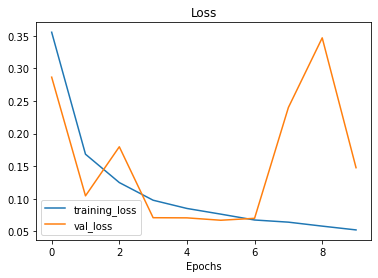

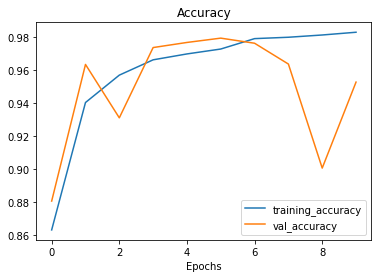

In [9]:
plot_loss_curves(history)

In [10]:
tf.keras.utils.plot_model(model, to_file='Inceptionv3.png',expand_nested=True,show_shapes=True)

In [11]:
Accuracy['Inception'] = history.history['accuracy'][-1]

In [12]:
Accuracy['Inception']

0.982878565788269

In [13]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

132/132 [==============================] - 214s 2s/step - loss: 0.1477 - accuracy: 0.9527
test accuracy :  0.9526754021644592


In [14]:
model.save('Inceptionv3.h5')